# Numerical methods with Python: A. K. Gupta Book

## Roots of Algebraic and Transcendental equations

### Bisection method: Finding root of a function

**Algorithm:**

1. Define the function: $f(x)$.
2. Input: $a, b, tol$.
3. If $f(a) \times f(b) > 0$, no root. Exit.
4. Else: set $x_m = \frac{a+b}{2}$.
5. If $f(x_m) = 0$, $x_m$ is the root. Exit.
6. If $f(a) \times f(x_m) > 0$, set $b = x_m$. Else set $a = x_m$. (In this step we update $a$ and $b$.)
7. Until $|b-a| > tol$, repeat step-2 onwards. Finally the root is $\frac{a+b}{2}$.

In [ ]:
import numpy as np

def f(x):
    return x**3 - 2*x -5

a, b = eval(input('Enter the lower and upper limit: '))
print(a, b)

tol = 0.0001

while f(a) * f(b) > 0:
    print('No root exists in this region')
    break

while abs(b-a) >= tol:
    xm = (a+b)/2
    if f(xm) == 0:
        print('The root is = ', xm)
        break

    if f(a) * f(xm) < 0:
        b = xm
    else:
        a = xm

print('The root is = ', (a+b)/2)

Enter the lower and upper limit: 2, 3
2 3
The root is =  2.094573974609375


In [ ]:
# Find all the roots of any polynomial. Check the answer with bisection method above.

np.roots([1, 0, -2, -5])

# We see that the real root given by np.roots() function is actually the root found above using Bisection method.

array([ 2.09455148+0.j        , -1.04727574+1.13593989j,
       -1.04727574-1.13593989j])

### Sectant method

In the bisection method, the inital choice of points should be such that the root must lie within the two points. In the sectant method, there is no such bound or constraint. Also sectant method is faster than the bisection method.

**Formula:**

General iterative formula: \\
$x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$  .

The formula we will use in the code: \\
$x_2 = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0)}$  .


**Algorithm:**

1. Define the function: $f(x)$.
2. Input: $x_0, x_1, tol$.
3. Calculate $x_2$ from the recursion relation.
4. Update $x_0$ and $x_1$ for the next step: $x_0 = x_1$ and $x_1 = x_2$.
5. Repeat steps 3-4 until $|f(x)| > tol$.

In [ ]:
def f(x):
    return x**3 - 2*x - 5

x0, x1 = eval(input('Enter the initial values: x0 and x1 = '))
tol = eval(input('Enter the value of tolerance for accuracy = '))

while abs(f(x1)) >= tol:
    x2 = x1 - f(x1) * ((x1 - x0) / (f(x1) - f(x0)))
    x0 = x1
    x1 = x2
    print(x1, f(x1))

print('The root is = ', x1)


Enter the initial values: x0 and x1 = 4.0, 5.0
Enter the value of tolerance for accuracy = 0.001
3.135593220338983 19.55779315314614
2.732422141025565 9.93577670553025
2.316104226792702 2.792159290415599
2.1533819161700416 0.6785836997806793
2.101138358821797 0.0737919349670193
2.094764010805542 0.0023724159704592296
2.094552267499965 8.772421119296325e-06
The root is =  2.094552267499965


In the **Regula-falsi** method, the initial points $a$ and $b$ are chosen such that $f(a) \times f(b) < 0$, which confirms that the root lies in the range [$a, b$].

In [ ]:
# Exercise: Find the root of cos(x) - x*exp(x) = 0.

import numpy as np

def f(x):
    return np.cos(x) - x*np.exp(x)

x0, x1 = eval(input('Enter the initial values: x0 and x1 = '))
tol = eval(input('Enter the value of tolerance for accuracy = '))

while abs(f(x1)) >= tol:
    x2 = x1 - f(x1) * ((x1 - x0) / (f(x1) - f(x0)))
    x0 = x1
    x1 = x2
    print(x1, f(x1))

print('The root is = ', x1)


Enter the initial values: x0 and x1 = 3, 4
Enter the value of tolerance for accuracy = 0.001
2.611871084895776 -36.448436713298115
2.334785999744931 -24.803725732398963
1.7445830768992416 -10.15806019802278
1.3352253180972706 -4.841595893867823
0.9624315343433544 -1.9481719343678767
0.7114256682891784 -0.6916662447775478
0.5732549570626876 -0.176832634332297
0.5257967290876013 -0.02462184215165819
0.5181198161613928 -0.0011029599501304332
0.5177597936303179 -7.392217026058745e-06
The root is =  0.5177597936303179


### Newton-Raphson method


Suppose $x_0$ is an approximate solution of the equation $f(x) = 0$. Suppose $x_1 = x_0 + h$ is the correct root i.e., $f(x_1) = 0$. taylor's series expanson of $f(x)$ about $x_1$,

$f(x_1) = 0 = f(x_0 + h) = f(x_0) + h f^{\prime}(x)|_{x=x_0} + \frac{h^2}{2!} f^{\prime \prime}(x)|_{x=x_0} + ...$

Neglecting the second order and higher order terms,

$f(x_0) + h f^{\prime}(x)|_{x=x_0} = 0$

$\implies h = -\frac{f(x_0)}{f^{\prime}(x)|_{x=x_0}}$

Thus the correct root can be written in terms of the approximate root, $x_1 = x_0 + h = x_0 -\frac{f(x_0)}{f^{\prime}(x)|_{x=x_0}}$  -- (1).

So, given the initial approximation $x_0$, we can calculate $x_1$, $x_2$, $x_3$... in iterative manner.

The general iterative equation:

$x_{n+1} = x_n - \frac{f(x_n)}{f^{\prime}(x)|_{x=x_n}}$   -- (2).


**Algorithm:**
1. Define $f(x)$ and $f^{\prime}(x)$.
2. Give the initial value $x_0$ and tolerance.
3. Calculate $\frac{f(x)}{f^{\prime}(x)}$ and update $x_1$ according to Eq.(1).
4. Repeat step 3-4 until $|f(x_1)| > tol$.  



In [ ]:
# Newton-Raphson formula for finding roots of an equation.

# Define the function.
def f(x):
    return x**3 - 2*x -5

# Define the 1st derivative of the function.
def f1(x):
    return 3*x**2 - 2

x0 = 1  # Initial value
tol = 0.001

while abs(f(x0)) >= tol:
    x1 = x0 - f(x0) / f1(x0)
    x0 = x1
    print(x1)

print('The root is = ', x1)

7.0
4.76551724137931
3.3487027594802825
2.53159964100251
2.1739158849392317
2.097883686441764
2.0945577158500575
The root is =  2.0945577158500575


Sometimes the derivative of the function can not be evaluated analytically. We can calculate the derivative numerically, using forward or central difference formula:

**Forward difference:** $f^{\prime}(x) = \frac{df}{dx} = lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$

**Central difference:** $f^{\prime}(x) = \frac{df}{dx} = lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}$

In [ ]:
import numpy as np

# Define the function.
def f(x):
    return np.cos(x) - x*np.exp(x)

# Intial value.
x0 = 1
# Delta_x = dx = infinitesimally small change in the x.
dx = 0.001
# Tolerance or accuracy.
tol = 0.0001

# The forward differentiation or derivative.
def f1(x):
    return (f(x + dx) - f(x)) / dx


while abs(f(x0)) >= tol:
    x1 = x0 - f(x0) / f1(x0)
    x0 = x1
    print(x1)

print('The root is = ', x1)


0.6533195740053784
0.531483805866035
0.5179243260489943
0.517757526717192
The root is =  0.517757526717192


### Roots of complex functions

Suppose $z = x+ iy$ and $F(z)$ is a complex function. We have to find the roots of this function i.e., solve for the equation $F(z) = 0$. Complex roots come in pair (complex conjugates).

Break the complex function into real and imaginary parts: $F(z) = f(x, y) + i g(x, y)$.

Now $F(z) = 0$ means real and imaginary parts ar separately zero,

$f(x, y) = 0$ \\
$g(x, y) = 0$

It can be shown that the roots can be found using Newton-Raphson method (See A. K. Gupta's book for detail). If ($x_0, y_0$) be the initial approximate values for the roots, then the values are updated by Newton-Raphson formula,

$x_1 = x_0 + h$  \\
$y_1 = y_0 + k$

where,
$h = \frac{1}{J} \begin{vmatrix}
-f_0 & \frac{\partial f}{\partial y_0} \\
-g_0 & \frac{\partial g}{\partial y_0} \\
\end{vmatrix}$
and
$k = \frac{1}{J} \begin{vmatrix}
\frac{\partial f}{\partial x_0} & -f_0 \\
\frac{\partial g}{\partial x_0} & -g_0 \\
\end{vmatrix}$

where the Jacobian is,
$J = \begin{vmatrix}
\frac{\partial f}{\partial x_0} & \frac{\partial f}{\partial y_0} \\
\frac{\partial g}{\partial x_0} & \frac{\partial g}{\partial y_0} \\
\end{vmatrix}$

In the above, we have used short notation for simplification,

$f_0 = f(x_0, y_0)$, $g_0 = g(x_0, y_0)$.

$\frac{\partial f}{\partial x_0} = \frac{\partial f}{\partial x}|_{x = x_0}$

$\frac{\partial f}{\partial y_0} = \frac{\partial f}{\partial y}|_{y = y_0}$

$\frac{\partial g}{\partial x_0} = \frac{\partial g}{\partial x}|_{x = x_0}$

$\frac{\partial g}{\partial y_0} = \frac{\partial g}{\partial y}|_{y = y_0}$  


**Algorithm:**

1. Define the functions $f(x, y)$ and $g(x, y)$.
2. Provide the intial values $x_0$ and $y_0$.
3. Compute $h, k$ by Cramer's rule as given in the above formula.
4. Update: $x = x_0 + h$ and $y = y_0 + k$ .
5. Check the absolute value of the complex function $F(z) = f(x, y) + i g(x, y)$. If this is larger than the accuracy level, repeat step 3- 5.

In [ ]:
import numpy as np

# Define the complex function
def F(x, y):
    z = x + 1j*y
    return z**2 + 4*z + 5

# Define the real part of F(z) as f(x, y)
def f(x, y):
    return F(x, y).real

# Define the imaginary part of F(z) as g(x, y)
def g(x, y):
    return F(x, y).imag

# Initial values
x0 = 1
y0 = 1

# Infinitisimal change in x and y for doing derivative.
dx = 0.001
dy = 0.001

tol = 0.001


while abs(F(x0, y0)) >= tol:
    f0 = f(x0, y0)   # value of f(x, y) at the point (x0, y0).
    f1_x_x0 = (f(x0+dx, y0) - f(x0, y0)) / dx   # first order partial derivative of f(x, y) wrt x at the point (x0, y0).
    f1_y_y0 = (f(x0, y0+dy) - f(x0, y0)) / dy   # first order partial derivative of f(x, y) wrt x at the point (x0, y0).

    g0 = g(x0, y0)
    g1_x_x0 = (g(x0+dx, y0) - g(x0, y0)) / dx   # first order partial derivative of g(x, y) wrt x at the point (x0, y0).
    g1_y_y0 = (g(x0, y0+dy) - g(x0, y0)) / dy   # first order partial derivative of g(x, y) wrt x at the point (x0, y0).

    J = (f1_x_x0 * g1_y_y0) - (f1_y_y0 * g1_x_x0)  # The Jacobian.

    h = ((-f0 * g1_y_y0) - (-g0 * f1_y_y0)) / J   # Calculate h by Cramer's rule as given in the above formula.
    k = ((-g0 * f1_x_x0) - (-f0 * g1_x_x0)) / J   # Calculate k by Cramer's rule as given in the above formula.

    # Update x and y
    x1 = x0 + h
    x0 = x1
    y1 = y0 + k
    y0 = y1

    print(x1, y1, abs(F(x1, y1)))

print('The root is = ', (x1 + 1j * y1))

# The other root will be the complex conjugate of the ans i.e., (-2 - 1j).


-0.649820035992958 0.5499400119975426 2.9254937718594136
-1.6422677032585322 0.40423254424784105 1.0069940752513273
-2.4342129061405458 0.8948871186131185 0.8684909441810119
-1.9975712695242733 0.8998925884794167 0.1902494510766057
-2.0002850356572286 1.0055039265700674 0.01105293850981423
-2.0000015551558037 1.0000178927015255 3.592063747102213e-05
The root is =  (-2.0000015551558037+1.0000178927015255j)


### Find Root directly using Numpy and Scipy functions

Also, there is a powerful function in Numpy, $np.roots()$ which directly calculate the roots of any polynimial: both real and imaginary. For this you dont's have to write any code.

In [ ]:
np.roots([1, 4, 5])

array([-2.+1.j, -2.-1.j])

We can also use the *bisection* and *Newton-Raphson* methods without writing any code, but using the **optimize** module of the **Scipy** library. There is $bisect()$ and $newton()$ function in this module.

In [ ]:
from scipy.optimize import bisect
from scipy.optimize import newton

def f(x):
    return x**3 - 2*x - 5

print('The root using bisection method = ', bisect(f, 2, 3))

print('The root using the Newton-Raphson method = ', newton(f, 1))

The root using bisection method =  2.0945514815412025
The root using the Newton-Raphson method =  2.0945514815423265


### Minimize a function: Find the local minima of a function

In **Scipy**, there is a very important module **optimize** using which we can find roots, curve fitting, minimizing a function and many more.

To minimize a function, we use $fmin()$ function of the **optimize** module. This uses downhill simplex algorithm. Simply $fmin(f, x_0)$ function takes the function and the initial guess as arguments and return the value which minimizes the function.  

In [ ]:
from scipy.optimize import fmin

def f(x):
    return x**3 - 2*x - 5

fmin(f, 1)

# The minimum of the above function is found at 0.8165.

Optimization terminated successfully.
         Current function value: -6.088662
         Iterations: 13
         Function evaluations: 26


array([0.81650391])

### Exercises

In [ ]:
# Q5. Find the value of sqrt(10) using Newton-Raphson method with the initial guess 3.

# If we take eq. x^2 = 10, then we can find the value of sqrt(10). In that case, we have to find the root of the
# function x^2 - 10 i.e. find the value of x for x^2 - 10 = 0.

import numpy as np

# Define the function.
def f(x):
    return x**2 - 10

# Intial value.
x0 = 3
# Delta_x = dx = infinitesimally small change in the x.
dx = 0.001
# Tolerance or accuracy.
tol = 0.000000001

# The forward differentiation or derivative.
def f1(x):
    return 2*x


while abs(f(x0)) >= tol:
    x1 = x0 - f(x0) / f1(x0)
    x0 = x1
    # print(x1)

print('The root is = ', x1)


The root is =  3.1622776601698424


In [ ]:
# Q6. Solve x = tan(x) using bisection method.

import numpy as np

def f(x):
    return x - np.tan(x)

a, b = eval(input('Enter the lower and upper limit: '))
tol = 0.001

while f(a) * f(b) > 0:
    print('No root in this range')
    break

while abs(b-a) >= tol:
    xm = (a + b) / 2

    if f(xm) == 0:
        print('The root is = ', xm)
        break

    elif f(a) * f(xm) < 0:
        b = xm
    else:
        a = xm

print('The root is = ', (a+b) / 2)

# The value of the root is = 0.

Enter the lower and upper limit: -0.5, 1
The root is =  -0.0001220703125


In [ ]:
# Q11. Find root of the equation x^3 - 3x + 6 = 0 starting with x0 = 1.

import numpy as np

# Define the function.
def f(x):
    return x**3 - 3*x + 6

# Intial value.
x0 = 1
# Delta_x = dx = infinitesimally small change in the x.
dx = 0.001
# Tolerance or accuracy.
tol = 0.0001

# The forward differentiation or derivative.
def f1(x):
    return (f(x + dx) - f(x)) / dx


while abs(f(x0)) >= tol:
    x1 = x0 - f(x0) / f1(x0)
    x0 = x1
    print(x1)

print('The root is = ', x1)


-1331.8890371591583
-887.9261931200149
-591.9512154118604
-394.63494219911627
-263.0913303079228
-175.39644977828954
-116.93449924643834
-77.96184741309108
-51.98311337053398
-34.66864553860165
-23.133008426296577
-15.454290230030054
-10.354257298504958
-6.986332344305445
-4.796488547421799
-3.433551553825254
-2.6863241286071182
-2.400585067837882
-2.3563061476114884
-2.3553014000790813
The root is =  -2.3553014000790813


In [ ]:
np.roots([1, 0, -3, 6])

array([-2.3553014+0.j        ,  1.1776507+1.07730381j,
        1.1776507-1.07730381j])

In [ ]:
# Q12.

import numpy as np

def f(x):
    return (x**2 - (np.cos(x))**2)

a, b = eval(input('Enter the lower and upper limit: '))

tol = 0.0001

while f(a) * f(b) > 0:
    print('No root exists in this region')
    break

while abs(b-a) >= tol:
    xm = (a+b)/2
    if f(xm) == 0:
        print('The root is = ', xm)
        break

    if f(a) * f(xm) < 0:
        b = xm
    else:
        a = xm

print('The root is = ', (a+b)/2)

# We get the ground state energy. In the similar manner, we can find the other excited state energies.


Enter the lower and upper limit: 0, 1
The root is =  0.739105224609375


In [ ]:
# Q13.

# For neither profit nor loss, we must have P(q) = 5q (assuming that the firm produce q Kg per day).
# This implies P(q) = 100 + 2q + 3q^(2/3) = 5q
# Or, f(q) = P(q) - 5q = 0. We have to find the roots of this equation.


import numpy as np

# Define the function.
def f(x):
    return 100 + 2*x + 3*x**(2/3) - 5*x  # Replacing q by x.

# Intial value.
x0 = 1
# Delta_x = dx = infinitesimally small change in the x.
dx = 0.001
# Tolerance or accuracy.
tol = 0.0001

# The forward differentiation or derivative.
def f1(x):
    return (f(x + dx) - f(x)) / dx


while abs(f(x0)) >= tol:
    x1 = x0 - f(x0) / f1(x0)
    x0 = x1
    print(x1)

print('The root is = ', x1)

# Ans. The firm has to produce 46.21 Kg of chemical for neither profit nor loss.

100.96669257010804
47.33839955829053
46.21177067984259
46.2107474522454
The root is =  46.2107474522454


In [ ]:
# Q15.

import numpy as np

P = 1.01325 * 10**5
R = 0.082054
a = 3.592
b = 0.04267
T = 300

# Define the function.
def f(V):
    return ((P + a/V**2) * (V - b) - R*T)

# Intial value.
V0 = R*T / P
# print(V0)

# Delta_x = dx = infinitesimally small change in the x.
dV = 0.001

# Tolerance or accuracy.
tol = 0.0001

# The forward differentiation or derivative.
def f1(V):
    return (f(V0 + dV) - f(V0)) / dV


while abs(f(V0)) >= tol:
    V1 = V0 - f(V0) / f1(V0)
    V0 = V1
    # print(V1)

print('The root is = ', V1, 'm^3')


The root is =  0.04290835356973592 m^3


In [ ]:
# Q16.

import numpy as np
from sympy import *

A, B, x, t = symbols('A B x t')

# Displacement
x = exp(-t) * (A * cos(sqrt(12) * t * 0.5) + B * sin(sqrt(12) * t * 0.5))
print('The displacement is = ', x)

# Velocity
v = diff(x, t)
print('The derivative of displacement or the velocity = ', v)


The displacement is =  (A*cos(1.0*sqrt(3)*t) + B*sin(1.0*sqrt(3)*t))*exp(-t)
The derivative of displacement or the velocity =  -(A*cos(1.0*sqrt(3)*t) + B*sin(1.0*sqrt(3)*t))*exp(-t) + (-1.0*sqrt(3)*A*sin(1.0*sqrt(3)*t) + 1.0*sqrt(3)*B*cos(1.0*sqrt(3)*t))*exp(-t)


In [ ]:
# Q16.

import numpy as np

# Define the displacement function
def x(t):
    return (A*np.cos(1.0*np.sqrt(3)*t) + B*np.sin(1.0*np.sqrt(3)*t))*np.exp(-t)

print(x(0))

# Define the velocity function
def v(t):
    return -(A*np.cos(1.0*np.sqrt(3)*t) + B*np.sin(1.0*np.sqrt(3)*t))*np.exp(-t) + (-1.0*np.sqrt(3)*A*np.sin(1.0*np.sqrt(3)*t) + 1.0*np.sqrt(3)*B*np.cos(1.0*np.sqrt(3)*t))*np.exp(-t)

print(v(0))

# Given boundary conditions: x(0) = 1 and v(0) = 5, where v = dx/dt. Thus we get:
A = 1
B = 6/np.sqrt(3)


# Intial value.
t0 = 7

# Tolerance or accuracy.
tol = 0.001


while abs(x(t0)) >= tol:
    t1 = t0 - x(t0) / v(t0)
    t0 = t1
    # print(t1)

print('The root is = ', t1)


1.0
5.0
The root is =  5.277166769512199


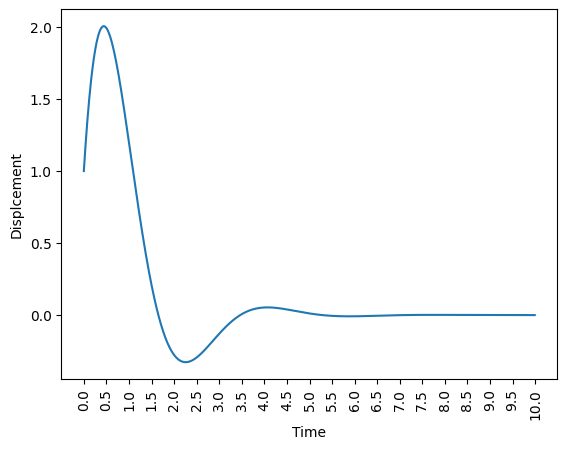

In [ ]:
# Plot
import matplotlib.pyplot as plt

t = np.arange(0, 10, 0.01)

A = 1
B = 6/np.sqrt(3)

x = (A*np.cos(1.0*np.sqrt(3)*t) + B*np.sin(1.0*np.sqrt(3)*t))*np.exp(-t)

# Plotting.
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Displcement')
plt.xticks(np.arange(0, 10.1, 0.5), rotation = 90)
plt.show()


In [ ]:
# Q16. Do using bisection method.

import numpy as np

def f(x):
    return (A*np.cos(1.0*np.sqrt(3)*x) + B*np.sin(1.0*np.sqrt(3)*x))*np.exp(-x)

a, b = eval(input('Enter the lower and upper limit: '))
print(a, b)

tol = 0.001

while f(a) * f(b) > 0:
    print('No root exists in this region')
    break

while abs(b-a) >= tol:
    xm = (a+b)/2
    if f(xm) == 0:
        print('The root is = ', xm)
        break

    if f(a) * f(xm) < 0:
        b = xm
    else:
        a = xm

print('The root is = ', (a+b)/2)


Enter the lower and upper limit: 5, 6
5 6
The root is =  5.27880859375


### Finding root using mixing_beta like in QE

In [ ]:
# Q12. Alternatively. Like we use mixing_beta in QE.

def f(x):
    return (x**2 - (np.cos(x))**2)

x0 = 7
tol = 0.0001

mix_beta = 0.7  # Check that the number of iterations depend on the value of mix_beta

while abs(f(x0)) >= tol:
    x1 = np.sqrt(np.cos(x0)**2)
    x0 = mix_beta * x1 + (1 - mix_beta) * x0
    print(x0)

print('The value of root = ', x0)

# This solution is very robust against the initial guess. While Newton-Raphson method largely depend on the initial guess,
# sometimes Newton-Raphson method can not give the root when the initial guess is very far away from the correct root.
# However, this method is very robust against the initial guess.


2.6277315780403137
1.397916655808763
0.5397888592134992
0.7624087098895561
0.7349447613859803
0.7397908846187075
0.7389639479747885
0.7391059161289452
The value of root =  0.7391059161289452


## Interpolation

### Lagrange interpolation

Interpolation is a type of estimation in which new data points are generated within the new range of given data points.

A curve is assumed to pass through each of the data points. [Note that in contrast to least square fit, a functional form is estimated to represent the data points where the curve may not go through all the data points].

Given a set of data points $(x_0, y_0), (x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, where the $x$-values are equally spaced: $x_i = x_0 + i h$ with $i = 0, 1, 2, ..., n$.

Now, we want to know the value of $y = f(x)$ for some intermediate value of $x$ i.e., $x_0 \le x \le x_n$.

**==> Lagrange interpolation:**

The lagrange interpolation function passes through all the given data points,

$\phi(x) = \sum_{i = 0}^{n} L_i(x) y_i$  ,

where, $L_i(x) = \prod_{j = 0, j \ne i}^{n} \frac{(x - x_j)}{(x_i - x_j)}$ .

**Exercise:**

In some experiment, data are recorded in terms of $(x, y)$ pair:

$x$: 5 10 15 20 25 30  \\
$y$: 45 105 174 259 364 496

Now find the valye of $y = f(x)$ for $x = 18$, using Lagrange interpolation formula.

In [ ]:
# Lagrange interpolation.

import numpy as np

# List of x data
x = [5, 10, 15, 20, 25, 30]

# List of y data
y = [45, 105, 174, 259, 364, 496]

# The point at which we have to find the value of y using interpolaiton.
xt = 18

n = len(x)

L = 1

# The Lagrange interpolation function is phi.
phi = 0

for i in range(n):
    L = 1
    for j in range(n):
        if j != i:
            L = L * ((xt - x[j]) / (x[i] - x[j]))

    phi = phi + L * y[i]

print('The interpolated value = ', phi)


The interpolated value =  222.826688


[45.0, 46.19454590015999, 47.38696640512, 48.57743393887999, 49.76611856383999, 50.95318799999999, 52.13880764415995, 53.32314058911997, 54.50634764287996, 55.688587347839956, 56.870015999999964, 58.05078766815997, 59.23105421312, 60.410965306879916, 61.59066845183995, 62.770308999999955, 63.95003017215998, 65.12997307711996, 66.31027673087995, 67.49107807583997, 68.67251199999993, 69.8547113561599, 71.03780698111993, 72.22192771487991, 73.40720041983982, 74.59374999999986, 75.78169942015994, 76.9711697251199, 78.16228005887987, 79.35514768383992, 80.54988799999984, 81.74661456415988, 82.94543910911987, 84.14647156287984, 85.34982006783983, 86.55559099999982, 87.76388898815983, 88.9748169331198, 90.18847602687984, 91.40496577183985, 92.62438399999981, 93.8468268921598, 95.07238899711983, 96.30116325087985, 97.53324099583983, 98.76871199999981, 100.00766447615979, 101.25018510111983, 102.4963590348798, 103.74626993983979, 104.99999999999977, 106.25762994015977, 107.51923904511979, 108.7

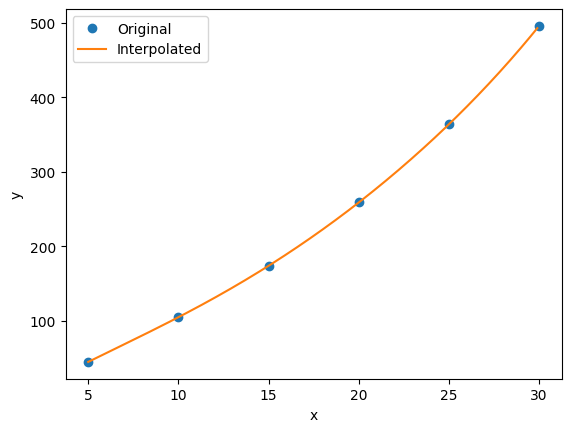

In [ ]:
# Making a Lagrange_Interpolation() function, plot the interpolated values, and compare with the original dataset.

import matplotlib.pyplot as plt

# List of x data
x = [5, 10, 15, 20, 25, 30]

# List of y data
y = [45, 105, 174, 259, 364, 496]

# Now make the above Lagrange interpolation in a function.
def Lagrange_interpolation(xt):
    n = len(x)

    L = 1
    # The Lagrange interpolation function is phi.
    phi = 0

    for i in range(n):
        L = 1
        for j in range(n):
            if j != i:
                L = L * ((xt - x[j]) / (x[i] - x[j]))

        phi = phi + L * y[i]

    return phi

D = []

# Calculate Lagrange interpolated value for a number of x values.
for i in np.arange(5, 30, 0.1):
    D.append(Lagrange_interpolation(i))

print(D)

# Plot.
plt.plot(x, y, 'o')    # Plot the original data points.
plt.plot(np.arange(5, 30, 0.1), D)   # Plot the interpolated values.
plt.legend(['Original', 'Interpolated'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# We see an excellent agreement between the original given data points and the Lagrange interpolated values.


### Finite difference method: Newton's interpolation

If $y_0, y_1, y_2, ..., y_n$ are $y$-values, then we define,

$\Delta y_0 = y_1 - y_0, \Delta y_1 = y_2 - y_1, ..., \Delta y_{n-1} = y_n - y_{n-1}$ ,

as the successive differences between the neighbouring $y$-values.

The symbol $\Delta$ stands for forward difference operator, and $\Delta y_0, \Delta y_1$ etc. are called first forward differences.

The differences between the first forward differences are known as second forward differences, and so on.

For example, $\Delta^2 y_0 = \Delta (\Delta y_0) = \Delta (y_1 - y_0) = \Delta y_1 - \Delta y_0 = (y_2 - y_1) - (y_1 - y_0) = y_2 - 2y_1 + y_0$.

Similarly, $\Delta^2 y_1 = y_3 - 2y_2 + y_1$,

$\Delta^3 y_0 = y_3 - 3y_2 + 3y_1 - y_0$,

$\Delta^4 y_0 = y_4 - 4y_3 + 6y_2 - 4y_1 + y_0$ .

Other differences of higher order can also be calculated in the same way.

We can think of a shift operator $E$ defined by following,

$E y_k = y_{k+1}$ , for any $k$.

So, $E^2 y_k = E (Ey_k) = Ey_{k+1} = y_{k+2}$ and so on.

In general, $E^n y_k = y_{k+n}$ .

This is similar to the raising operator in linear harmonic oscillator.

Now taking the difference,

$\Delta y_0 = y_1 - y_0 = Ey_0 - y_0 = (E-1)y_0$ .

So, $\Delta = (E - 1)$ .

With this formula, we can now very easily calculate the higher order differences.

e.g, $\Delta^3 y_0 = (E - 1)^3 y_0 = (E^3 - 3E^2 + 3E - 1)y_0 = E^3 y_0 - 3E^2 y_0 + 3E y_0 - y_0 = y_3 - 3y_2 + 3y_1 - y_0$ .



**Newton's interpolation formula:**

This is done throug a polynomial of degree $n$ for a set of $(n+1)$ equidistant data points: $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$, in which $x_i = x_0 + i h, i = 0, 1, 2, 3, ..., n$. Here, $h = $ step length.

It can be shown that (see A. K. Gupta's book for details) the Newton's interpolation polynomial can be written as forward differences,

$\phi(x) = y_0 + t \Delta y_0 + \frac{t(t-1)}{2!} \Delta^2 y_0 + \frac{t(t-1)(t-2)}{3!} \Delta^3 y_0 + ... + \frac{t(t-1)(t-2)...(t-n+1)}{3!} \Delta^n y_0$  ,

where, $t = \frac{x - x_0}{h}$ and $h = \frac{x_i - x_0}{i}$ .

As $t$ depends on $x$ explicitly, thus $\phi$ is function of $x$.

**Exercise:**

In some experiment, data are recorded in terms of $(x, y)$ pair:

$x$: 5 10 15 20 25 30  \\
$y$: 45 105 174 259 364 496

Now find the valye of $y = f(x)$ for $x = 18$, using Newton's interpolation formula.

In [ ]:
# Newton's interpolation.

import numpy as np

# Data set
x = [5, 10, 15, 20, 25, 30]

y = [45, 105, 174, 259, 364, 496]

# Step length
h = x[1] - x[0]

# xt is the x point at which we have to find the value of y.
xt = 18
t = (xt - x[0]) / h
print('The value of t =', t)


# phi is the Newton's interpolation function.
phi = 0

for n in range(len(y)):
    y = [45, 105, 174, 259, 364, 496]
    factor = 1
    for j in range(n):
        for i in range(len(y)-1):
            finite_diff = y[i+1] - y[i]   # Calculate the finite differences with the elements of y list.
            y[i] = finite_diff   # Replace the elements of y with the finite differences.
        y.pop(-1)   # Delete the last element from the y list.

        if n == 0:   # when n = 0, j is not defined. So, we assign the value of factor.
            factor = 1
        else:
            factor = factor * (t-j)   # when n >= 1, j can take values 0, 1, ...(n-1). Caculate the t-factor: t(t-1)(t-2)...(t-n+1)

    print('The value of t-factor for', n, 'th order term =', factor)
    print('The', n, 'th order finite differences = ' , y)   # List of finite differences for different orders given by n.
    print('The value of y0 for', n, 'th order finite differences =', y[0])   # Take only the 1st element y0 from the finite differences lists, for different n.
    phi = phi + ((factor * y[0]) / np.math.factorial(n))   # Sum for a specific order n and get each term of the phi series.
    print()   # Print a blank line for good looking.

print('The value of Newton interpolation at x =', xt, 'is', phi)   # Sum all the terms of different orders i.e., different n values, and get the final interpolated values.

# We see that the result 222.826688 matches exactly with the result obtained using the Lagrange interpolation method above.

The value of t = 2.6
The value of t-factor for 0 th order term = 1
The 0 th order finite differences =  [45, 105, 174, 259, 364, 496]
The value of y0 for 0 th order finite differences = 45

The value of t-factor for 1 th order term = 2.6
The 1 th order finite differences =  [60, 69, 85, 105, 132]
The value of y0 for 1 th order finite differences = 60

The value of t-factor for 2 th order term = 4.16
The 2 th order finite differences =  [9, 16, 20, 27]
The value of y0 for 2 th order finite differences = 9

The value of t-factor for 3 th order term = 2.4960000000000004
The 3 th order finite differences =  [7, 4, 7]
The value of y0 for 3 th order finite differences = 7

The value of t-factor for 4 th order term = -0.9984
The 4 th order finite differences =  [-3, 3]
The value of y0 for 4 th order finite differences = -3

The value of t-factor for 5 th order term = 1.39776
The 5 th order finite differences =  [6]
The value of y0 for 5 th order finite differences = 6

The value of Newton int

222.826688


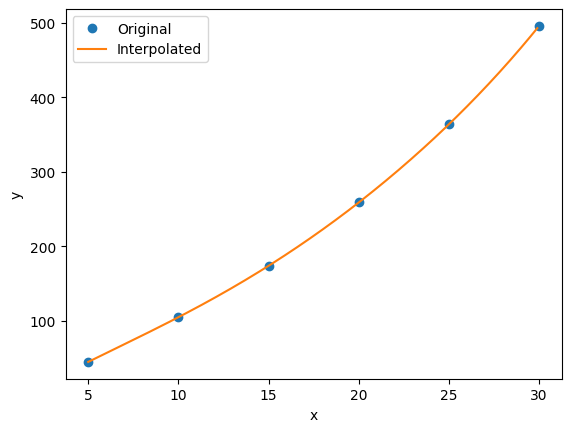

In [ ]:
# Making a Lagrange_Interpolation() function, plot the interpolated values, and compare with the original dataset.

import numpy as np
import matplotlib.pyplot as plt


def Newton_Interpolation(xt):
    # Data set
    x = [5, 10, 15, 20, 25, 30]

    y = [45, 105, 174, 259, 364, 496]

    # Step length
    h = x[1] - x[0]

    t = (xt - x[0]) / h
    # print('The value of t =', t)

    # phi is the Newton's interpolation function.
    phi = 0

    for n in range(len(y)):
        y = [45, 105, 174, 259, 364, 496]
        factor = 1
        for j in range(n):
            for i in range(len(y)-1):
                finite_diff = y[i+1] - y[i]   # Calculate the finite differences with the elements of y list.
                y[i] = finite_diff   # Replace the elements of y with the finite differences.
            y.pop(-1)   # Delete the last element from the y list.

            if n == 0:   # when n = 0, j is not defined. So, we assign the value of factor.
                factor = 1
            else:
                factor = factor * (t-j)   # when n >= 1, j can take values 0, 1, ...(n-1). Caculate the t-factor: t(t-1)(t-2)...(t-n+1)

        # print('The value of t-factor for', n, 'th order term =', factor)
        # print('The', n, 'th order finite differences = ' , y)   # List of finite differences for different orders given by n.
        # print('The value of y0 for', n, 'th order finite differences =', y[0])   # Take only the 1st element y0 from the finite differences lists, for different n.
        phi = phi + ((factor * y[0]) / np.math.factorial(n))   # Sum for a specific order n and get each term of the phi series.
        # print()   # Print a blank line for good looking.

    # print('The value of Newton interpolation at x =', xt, 'is', phi)   # Sum all the terms of different orders i.e., different n values, and get the final interpolated values.
    return phi


print(Newton_Interpolation(18))

D = []

for i in np.arange(5, 30, 0.1):
    D.append(Newton_Interpolation(i))


# Plot.
plt.plot(x, y, 'o')    # Plot the original data points.
plt.plot(np.arange(5, 30, 0.1), D)   # Plot the interpolated values.
plt.legend(['Original', 'Interpolated'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# We see an excellent agreement between the original given data points and the Newton interpolated values. Also excellent
# agreement with the Lagrange interpolated values.


**Exercise:**

Apply Newton's forward difference formula to evaluate trigonometric function at any angle?

$\theta$: 0, 15, 30, 45, 60, 75, 90

$sin(\theta)$: 0, 0.259, 0.5, 0.707, 0.866, 0.9659, 1

Estimate the value of $sin(18^{\circ})$.

Ans.: 0.3092 (with forward difference), and 0.30902 (standard value).

In [ ]:
import numpy as np

# Data set
x = [0, 15, 30, 45, 60, 75, 90]   # theta

y = [0, 0.259, 0.5, 0.707, 0.866, 0.9659, 1]   # sin(theta)

# Step length
h = x[1] - x[0]

# xt is the x point at which we have to find the value of y.
xt = 18
t = (xt - x[0]) / h
# print('The value of t =', t)


# phi is the Newton's interpolation function.
phi = 0

for n in range(len(y)):
    y = [0, 0.259, 0.5, 0.707, 0.866, 0.9659, 1]
    factor = 1
    for j in range(n):
        for i in range(len(y)-1):
            finite_diff = y[i+1] - y[i]   # Calculate the finite differences with the elements of y list.
            y[i] = finite_diff   # Replace the elements of y with the finite differences.
        y.pop(-1)   # Delete the last element from the y list.

        if n == 0:   # when n = 0, j is not defined. So, we assign the value of factor.
            factor = 1
        else:
            factor = factor * (t-j)   # when n >= 1, j can take values 0, 1, ...(n-1). Caculate the t-factor: t(t-1)(t-2)...(t-n+1)

    # print('The value of t-factor for', n, 'th order term =', factor)
    # print('The', n, 'th order finite differences = ' , y)   # List of finite differences for different orders given by n.
    # print('The value of y0 for', n, 'th order finite differences =', y[0])   # Take only the 1st element y0 from the finite differences lists, for different n.
    phi = phi + ((factor * y[0]) / np.math.factorial(n))   # Sum for a specific order n and get each term of the phi series.
    # print()   # Print a blank line for good looking.

print('The value of Newton interpolation at x =', xt, 'is', phi)   # Sum all the terms of different orders i.e., different n values, and get the final interpolated values.



The value of Newton interpolation at x = 18 is 0.3091766067200001


### Interpolation with SciPy

We use **interpolate** module from **SciPy** library for different interpolation functions.

In [ ]:
from scipy import interpolate

dir(interpolate)

['Akima1DInterpolator',
 'BPoly',
 'BSpline',
 'BarycentricInterpolator',
 'BivariateSpline',
 'CloughTocher2DInterpolator',
 'CubicHermiteSpline',
 'CubicSpline',
 'InterpolatedUnivariateSpline',
 'KroghInterpolator',
 'LSQBivariateSpline',
 'LSQSphereBivariateSpline',
 'LSQUnivariateSpline',
 'LinearNDInterpolator',
 'NdPPoly',
 'NearestNDInterpolator',
 'PPoly',
 'PchipInterpolator',
 'RBFInterpolator',
 'Rbf',
 'RectBivariateSpline',
 'RectSphereBivariateSpline',
 'RegularGridInterpolator',
 'SmoothBivariateSpline',
 'SmoothSphereBivariateSpline',
 'UnivariateSpline',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bspl',
 '_bsplines',
 '_cubic',
 '_fitpack',
 '_fitpack2',
 '_fitpack_impl',
 '_fitpack_py',
 '_interpolate',
 '_ndgriddata',
 '_pade',
 '_polyint',
 '_ppoly',
 '_rbf',
 '_rbfinterp',
 '_rbfinterp_pythran',
 '_rgi',
 '_rgi_cython',
 'approximate_taylor_polynomial',
 'barycentric

In [ ]:
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadra

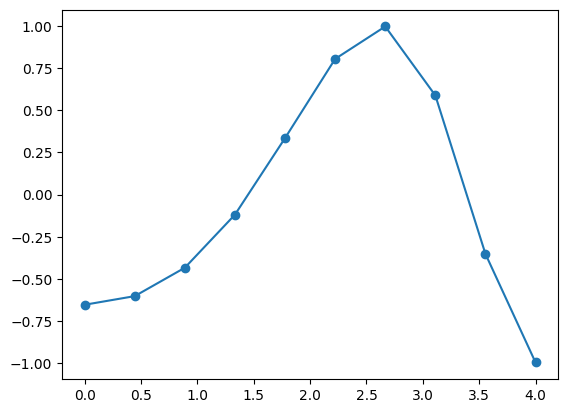

In [ ]:
# We have 10 datapoints. Discrete datapoints and the line is showed for a guide to eye.

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 10)

y = np.cos(x**2/3 + 4)

plt.plot(x, y, '-o')
plt.show()

Now, we create the interpolating function for the given data points, and then create a set of intermediate points.

**Interpolation with Cubic spline:**

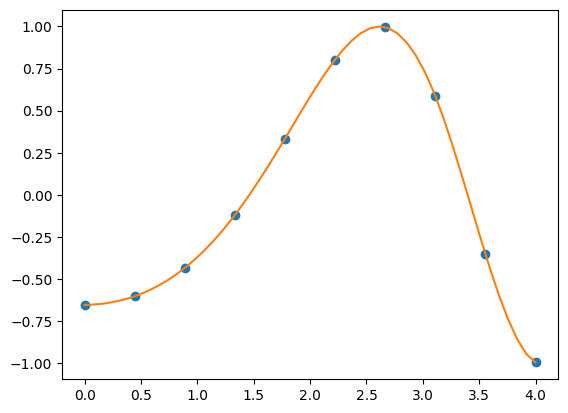

In [ ]:
# Polynomial interpolation with cubic spline.

x = np.linspace(0, 4, 10)

y = np.cos(x**2/3 + 4)

f = interpolate.interp1d(x, y, kind = 'cubic')

xnew = np.linspace(0, 4, 50)

ynew = f(xnew)

plt.plot(x, y, 'o')
plt.plot(xnew, ynew)
plt.show()

**Lagrange interpolation with SciPy:**

In [ ]:
import numpy as np
from scipy.interpolate import lagrange

x = np.arange(0, 5, 0.5)
print(x)

y = x**2
print(y)

phi = lagrange(x, y)   # Lagrange interpolation using SciPy function lagrange().

phi(1.2)

# This lagrange() function is numerically instable for more than 20 data points.

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25]


1.4400000000010114

### Differentiation via interpolation

We need interpolation to perform differentiation. For mumerical differentiation, we use finite difference (forward and backward) method to compute approximate derivatives directly. For a set of data points: $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$, where $x_i = x_0 + ih$, $h$ = step length = $x_1 - x_0 = x_2 - x_1 = ... = x_n - x_{n-1}$.  

**First derivative:** $\frac{dy}{dx}|_{x = x_0} \approx \frac{\Delta y}{\Delta x}|_{x_0} = \frac{y_1 - y_0}{x_1 - x_0} = \frac{\Delta y_0}{h}$ [as by the definition of forward difference, $\Delta y_0 = y_1 - y_0$.]

Similarly, second derivative: $\frac{d^2y}{dx^2}|_{x = x_0} \approx \frac{\Delta^2 y_0}{h^2}$.

In [ ]:
# Derivative by forward differences
# 1st derivative.

import numpy as np

x = [2, 4, 6, 8, 10]   # Time
y = [10, 12.5, 16, 21.8, 32.4]   # Displacement

n = len(x)

h = 2

sum = 0

for i in range(1, n):
    y = np.diff(y)
    print(y)

    sum = sum + ((-1)**(i-1) * y[0] / i)   # See A. K. Gupta's book for formula of f1(x0), where f1 is the 1st derivative of f.

print('The value of f1(x0) =', sum / h)   # Velocity


[ 2.5  3.5  5.8 10.6]
[1.  2.3 4.8]
[1.3 2.5]
[1.2]
The value of f1(x0) = 1.0666666666666673


In [ ]:
# 2nd derivative.

import numpy as np

x = [2, 4, 6, 8, 10]
y = [10, 12.5, 16, 21.8, 32.4]
y = np.diff(y)

n = len(x)

h = 2

terms = []

for i in range(1, n-1):
    y = np.diff(y)
    print(y)

    terms.append(y[0])   # See A. K. Gupta's book for formula of f2(x0), where f2 is the 2nd derivative of f.

print(terms)
print('The value of f2(x0) =', (terms[0] - terms[1] + (11/12) * terms[2]) / h**2)   # Acceleration


[1.  2.3 4.8]
[1.3 2.5]
[1.2]
[1.0, 1.3000000000000007, 1.1999999999999957]
The value of f2(x0) = 0.19999999999999885


## Integration

Definite integral of a function with single variable:

$I = \int_a^b f(x) dx$

Why do we need to integrate a function by numerical methods? We often fail to integrate a function analytically, even if the function may be simple looking. Also sometimes the function is not explicitly given, rather some data points are given. In such cases, we need to perform integration using numerical methods in computers.

A definite integral gives the area under the curve -- the area between the $f(x)$ curve and the $x$-axis.

For numerical integration, the function $f(x)$ is approximated by some suitable interpolation function, $\phi(x)$:

$I = \int_a^b f(x)~dx \approx \int_a^b \phi(x)~dx$

We can take $\phi(x)$ as the Newton's interpolation function:

$\phi(x) = y_0 + t \Delta y_0 + \frac{t(t-1)}{2!} \Delta^2 y_0 + \frac{t(t-1)(t-2)}{3!} \Delta^3 y_0 + ... + \frac{t(t-1)(t-2)...(t-n+1)}{3!} \Delta^n y_0$  ,

where, $t = \frac{x - x_0}{h}$ and $h = \frac{x_i - x_0}{i}$ .

As $t$ depends on $x$ explicitly, thus $\phi$ is function of $x$.

The interpolating function contains the forward differences. We have to truncate the series upto some term depending on the convergence and computation time.

### Rectangle rule

In this case we truncate the series upto $n = 0$ i.e., $\Delta^0 y_0 = y_0$ term. We divide the $f(x)$ curve into $n$ equal subintervals, each of which is a rectangle of equal width $h$ and length $y_i$. Here, $x_i = x_0 + ih$, with $i = 0, 1, 2, ..., n$. And $y_i$ is the value of $f(x_i)$ or $\phi(x_i)$ at the point $x_i$. In this case, it can be shown:

$I = \int_{x_0}^{x_n} y~dx =$ Area under the $f(x)$ curve = Sum of areas of $n$ rectangles $= h [y_0 + y_1 + y_2 + ... + y_{n-1}]$ ,

with step length $ = h = (b-a) / n$. So, $a = x_0, b = x_n$.

$==>$ Do integration: $\int_0^1 x^2~dx$ using rectangle rule.

In [ ]:
# Numerical integration using Rectangle rule.

# Define the function or integrand to be integrated.
def f(x):
    return x**2

# Lower and upper limit.
a = 0
b = 1

# Number of subintervals to break the interval [a, b].
n = 100

# Step length
h = (b - a) / n

# Initial sum
sum = 0

# Loop of integration
x = a
for i in range(n):
    sum = sum + h * f(x)
    x = x + h

print('The value of the integration =', sum)

# The exact value of the integration is 1/3 = 0.3333333....
# So, rectangle method is giving quate a good result with large number of subintervals n.

The value of the integration = 0.32835000000000036


### Trapezoidal rule

In this case we truncate the series upto $n = 1$ i.e., $\Delta^1 y_0 = \Delta y_0 = y_1 - y_0$ term. So, $\phi(x) = y_0 + t \Delta y_0$. We divide the $f(x)$ curve into $n$ equal subintervals, each of which is a trapezoid of equal width $h$ and height given by $y_i$ and $y_{i+1}$. Here, $x_i = x_0 + ih$, with $i = 0, 1, 2, ..., n$. And $y_i$ is the value of $f(x_i)$ or $\phi(x_i)$ at the point $x_i$. The area of a single trapezoid is (the $i^{th}$ trapezoid) = $\frac{h(y_i + y_{i+1})}{2}$. In this case, it can be shown:

$I = \int_{x_0}^{x_n} y~dx =$ Area under the $f(x)$ curve = Sum of areas of $n$ trapezoids $= \frac{h}{2} [(y_0 + y_1) + (y_1 + y_2) + ... + (y_{n-1} + y_n)]$ = $\frac{h}{2} [y_0 + 2(y_1 + y_2 + y_3 + ... + y_{n-1}) + y_n]$,

with step length $ = h = (b-a) / n$, So, $a = x_0, b = x_n$.

In [ ]:
# Numerical integration using Trapezoidal rule.

# Define the function or integrand to be integrated.
def f(x):
    return x**2

# Lower and upper limit
a = 0
b = 1

# Number of subintervals to break the interval [a, b].
n = 100

# Step length
h = (b - a) / n

# Set the initial sum by taking the value of the function at the very first point and very last point. f(x0) = f(a) = y0 and f(xn) = f(b) = yn.
sum = h * 0.5 * (f(a) + f(b))

# Loop of integration.
x = a + h   # After calculating f(x0) = f(a), now change x = a + h = x0 + h = x1. So, within the loop, we first calculate f(x1) = y1. Repeat the loop (n-1) times, so, we get y1, y2, ..., y_n-1 within the loop.
for i in range(n-1):
    sum = sum + h * 0.5 * 2 * f(x)
    x = x + h

print('The value of the integration =', sum)

# The exact value of the integration is 1/3 = 0.3333333....
# So, rectangle method is giving quate a good result with large number of subintervals n.
# We see that with n = 100, trapezoidal rule gives better result than the rectangle rule.

The value of the integration = 0.33335000000000037


In [ ]:
# The above integration can also be done using NumPy array slicing.
# In this case, we just do the sum using np.sum() function with numpy array slicing instead of using for loop.
# Integration using Trapezoidal rule.

import numpy as np

# Array of x values
x = np.linspace(0, 1, 101)   # Giving the step length as before.
# print(x)

print('The length of data set,', 'n+1', '=', len(x))   # This is basically (n+1), as data starts from x0 and ends at xn. So, total (n+1) data points.

# Number of subintervals
n = len(x) - 1

# Step length
h = x[1] - x[0]
print('The step length,', 'h', '=', h)

# Array of y = f(x) values
y = x**2
# print(y)

# Sum or integration
sum = h * 0.5 * (y[0] + y[100] + 2 * np.sum(y[1:-1]))

print('The value of the integration =', sum)


The length of data set, n+1 = 101
The step length, h = 0.01
The value of the integration = 0.33335000000000004


### Simpson's 1/3 rule

In this case we truncate the series upto $n = 2$ i.e., $\Delta^2 y_0$ term. So, $\phi(x) = y_0 + t \Delta y_0 + \frac{t(t-1)}{2!} \Delta^2 y_0$. In this case, the curve is approximated as a second order polynomial or quadratic function. It can be shown,

$I = \int_{a}^{b} f(x)~dx = \int_{x_0}^{x_n} f(x)~dx = \frac{h}{3} [y_0 + 4(y_1 + y_3 + y_5 + ... + y_{n-1}) + 2(y_2 + y_4 + y_6 + ... + y_{n-2}) + y_n]$

with step length $ = h = (b-a) / n$, So, $a = x_0, b = x_n$.

In [ ]:
# Using NumPy array slicing.
# In this case, we just do the sum using np.sum() function with numpy array slicing instead of using for loop.
# Integration using Simpson's 1/3 rule.

import numpy as np

# Array of x values
x = np.linspace(0, 1, 101)   # Giving the step length as before.
# print(x)

print('The length of data set,', 'n+1', '=', len(x))   # This is basically (n+1), as data starts from x0 and ends at xn. So, total (n+1) data points.

# Number of subintervals
n = len(y) - 1

# Step length
h = x[1] - x[0]
print('The step length,', 'h', '=', h)

# Array of y = f(x) values
y = x**2
# print(y)

# Sum or integration
sum = h * (1/3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])

print('The value of the integration =', sum)

# We see excellent value with this method.

The length of data set, n+1 = 101
The step length, h = 0.01
The value of the integration = 0.3333333333333333


### Simpson's 3/8 rule

Retaining one more term in the interpolation function we can get better result.

It can be shown,

$I = \int_{a}^{b} f(x)~dx = \int_{x_0}^{x_n} f(x)~dx = \frac{3h}{8} [y_0 + 3(y_1 + y_2 + y_4 + y_5 + ... + y_{n-1}) + 2(y_3 + y_6 + y_9 + y_{12} + ... + y_{n-3}) + y_n]$

with step length $ = h = (b-a) / n$, So, $a = x_0, b = x_n$.

In [ ]:
# Define the function or integrand to be integrated.
def f(x):
    return x**2

# Lower and upper limit
a = 0
b = 1

# Number of subintervals to break the interval [a, b].
n = 100

# Step length
h = (b - a) / n


sum = f(a) + f(b)

x = a + h
for i in range(1, n):
    # print(x)
    if i%3 == 0:
        sum = sum + 2 * f(x)
    else:
        sum = sum + 3 * f(x)
    x = x + h

print('The value of the integration =', sum * ((3 * h) / 8))


The value of the integration = 0.33085837500000037


## Ordinary Differential Equations (ODE)

### First order ODE

Consider the first order ODE,

$\frac{dy}{dx} = f(x, y)$,

with the initial condition, $y(x_0) = y_0$.

In the **Euler's method**, we solve this ODE for $y(x)$ at different values of $x$. Consider the grid points of independent variable,

$x_n = x_0 + n h   ~~~~~(n = 1, 2, 3, ...)$,

where $n$ is the number of grid points with step length,

$h = x_1 - x_0 = x_2 - x_1 = ... = x_n - x_{n-1}$.  

So, we solve for $y(x_i) = y_i$ at all the $x_i$ points for $i = 0, 1, 2, ...$.

In Eulers's formula,

$y_1 = y_0 + h f(x_0, y_0)$,

or in general,

$y_{i+1} = y_i + h f(x_i, y_i)$ .

This is done by rectangle rule.

In **modified Euler's method**, we use better approximation using Trapezoidal rule, the general $i^{th}$ iteration formula,

$y_1^{(i)} = y_0 + \frac{h}{2} [f(x_0, y_0) + f(x_1, y_1^{(i-1)})]$ .





Now we will solve ODE using Euler's and modified Euler's method and compare that with the exact solution.

Take the following ODE,

$\frac{dy}{dx} = x + y + 1$,

with the initial condition: $y(x = 0) = y(0) = 0$.

Exact solution: $y = 2 e^x - x - 2$.


[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004]
[0, 0.1, 0.22, 0.362, 0.5282, 0.72102, 0.943122, 1.1974342, 1.48717762, 1.815895382, 2.1874849201999997, 2.60623341222, 3.0768567534419997, 3.6045424287862, 4.1949966716648195, 4.854496338831302, 5.589945972714432, 6.408940569985875, 7.319834626984463, 8.331818089682908, 9.454999898651199]
21 21


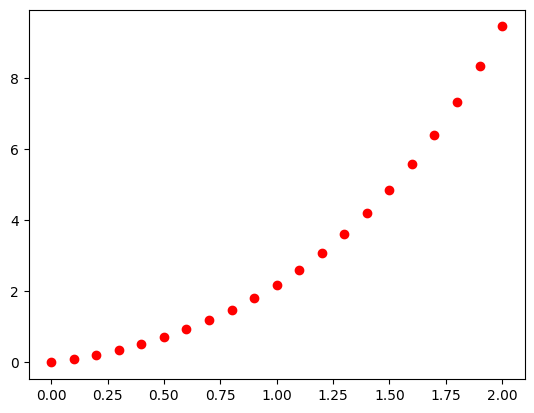

In [ ]:
# Euler's method
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return (x + y + 1)

# Initial condition
x = 0
y = 0

# Step length
h = 0.1

# Data collection list
x_Euler = [x]
y_Euler = [y]

# Euler method
while x < 2:
    y = y + h * f(x, y)
    y_Euler.append(y)
    x = x + h
    x_Euler.append(x)

print(x_Euler)
print(y_Euler)
print(len(x_Euler), len(y_Euler))


# Plot
plt.plot(x_Euler, y_Euler, 'ro')
plt.show()


[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004]
[0, 0.1105, 0.24315512500000003, 0.40029720190625007, 0.5845034824068829, 0.7986224739302074, 1.0458024893113618, 1.3295232013113827, 1.6536305182494058, 2.022375130295156, 2.440455112758721, 2.9130630133765765, 3.445937895534461, 4.045422859039463, 4.7185286149533665, 5.473003751677209, 6.317412396541235, 7.261220051277201, 8.314888461674126, 9.489980472265328, 10.799275916971254]
21 21


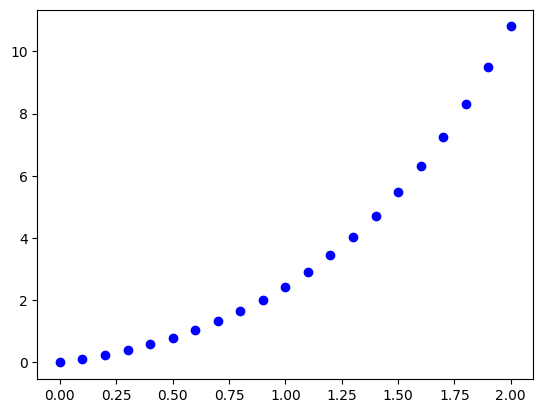

In [ ]:
# Modified Euler's method

def f(x, y):
    return (x + y + 1)

x0 = 0
y0 = 0
h = 0.1

x_modEuler = [x0]
y_modEuler = [y0]

tol = 0.01

x = x0
y = y0 + h * f(x0, y0)

y_old = y0

while x < 2:
    x = x + h
    y = y0 + h * f(x0, y0)

    while abs(y - y_old) > tol:
        y_old = y
        y = y0 + (0.5 * h  * (f(x0, y0) + f(x, y)))

    x0 = x
    y0 = y

    x_modEuler.append(x)
    y_modEuler.append(y)

print(x_modEuler)
print(y_modEuler)
print(len(x_modEuler), len(y_modEuler))


# Plot
plt.plot(x_modEuler, y_modEuler, 'bo')
plt.show()

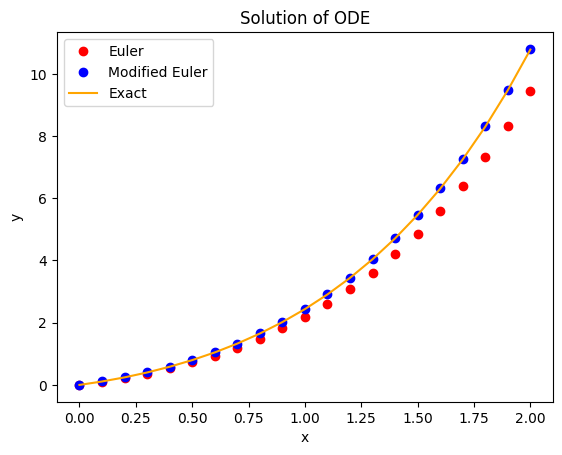

In [ ]:
# Comparison
import numpy as np

exact_soln = 2*np.exp(x_Euler) - x_Euler - 2

plt.plot(x_Euler, y_Euler, 'ro')
plt.plot(x_modEuler, y_modEuler, 'bo')
plt.plot(x_Euler, exact_soln, 'orange')
plt.legend(['Euler', 'Modified Euler', 'Exact'])
plt.title('Solution of ODE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Exercise

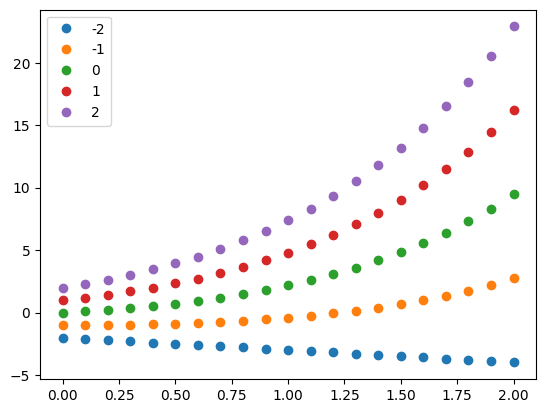

In [ ]:
# Euler's method for different initial conditions.

import matplotlib.pyplot as plt

def f(x, y):
    return (x + y + 1)

h = 0.1

# Euler method with different initial conditions. i.e., (i) y = -2 at x = 0, (ii) y = -1 at x = 0, ..., (v) y = 2 at x = 0.
for y in [-2, -1, 0, 1, 2]:
    x = 0
    x_Euler = [x]
    y_Euler = [y]

    while x < 2:
        y = y + h * f(x, y)
        y_Euler.append(y)
        x = x + h
        x_Euler.append(x)

    # print(x_Euler)
    # print(y_Euler)
    # print(len(x_Euler), len(y_Euler))

    # Plot
    plt.plot(x_Euler, y_Euler, 'o')
    plt.legend([-2, -1, 0, 1, 2])
plt.show()   # plt.show() is outside of the for loop to show all the figures together.

# We see that the solution of the ODE highly depends on the initial condition.


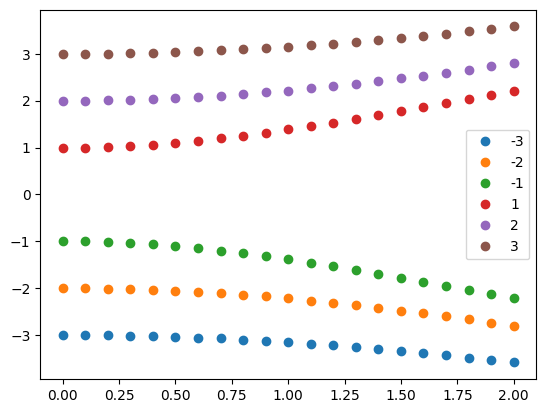

In [ ]:
# Euler's method for different initial conditions.

import matplotlib.pyplot as plt

def f(x, y):
    return (x / y)

h = 0.1
y_initial_list = [-3, -2, -1, 1, 2, 3]

# Euler method with different initial conditions. i.e., (i) y = -3 at x = 0, (ii) y = -2 at x = 0, ..., (v) y = 3 at x = 0.
for y in y_initial_list:
    x = 0
    x_Euler = [x]
    y_Euler = [y]

    while x < 2:
        y = y + h * f(x, y)
        y_Euler.append(y)
        x = x + h
        x_Euler.append(x)

    # print(x_Euler)
    # print(y_Euler)
    # print(len(x_Euler), len(y_Euler))

    # Plot
    plt.plot(x_Euler, y_Euler, 'o')
    plt.legend(y_initial_list)
plt.show()   # plt.show() is outside of the for loop to show all the figures together.

# We see that the solution of the ODE highly depends on the initial condition.


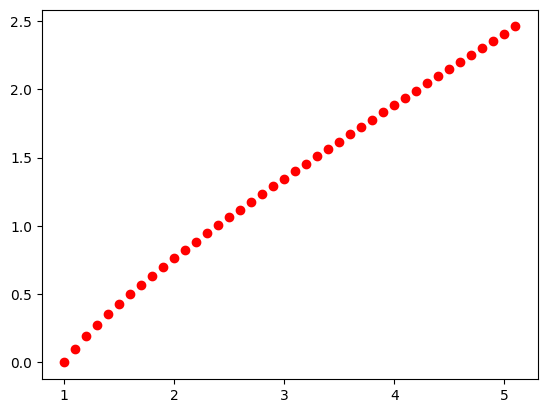

In [ ]:
# Euler's method
import matplotlib.pyplot as plt

def f(x, y):
    return ((x-y) / x)

x = 1
y = 0
h = 0.1

x_Euler = [x]
y_Euler = [y]

while x < 5:
    y = y + h * f(x, y)
    y_Euler.append(y)
    x = x + h
    x_Euler.append(x)

# print(x_Euler)
# print(y_Euler)
# print(len(x_Euler), len(y_Euler))


# Plot
plt.plot(x_Euler, y_Euler, 'ro')
plt.show()


[-0.1, -0.2, -0.30000000000000004, -0.4, -0.5, -0.6, -0.7, -0.7999999999999999, -0.8999999999999999, -0.9999999999999999, -1.0999999999999999, -1.2, -1.3, -1.4000000000000001, -1.5000000000000002, -1.6000000000000003, -1.7000000000000004, -1.8000000000000005, -1.9000000000000006, -2.0000000000000004, 0, 0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006]
[1.625, 1.7673471562497074, 1.9392075395941517, 2.156903057630664, 2.4449279672705213, 2.843551499285394, 3.4250157668667502, 4.332244794952657, 5.884881226299623, 8.926727954303121, 16.288904685493904, 41.78169262402746, 213.87498689696832, 4776.503122719098, 2286039.1677642874, 522599691677.5816, 2.7311043774651832e+22, 7.458931120609486e+43, 5.563565346199668e+86, 3.095325936143383e+172, 1.5, 1.625, 1.7625393192489962, 1.913

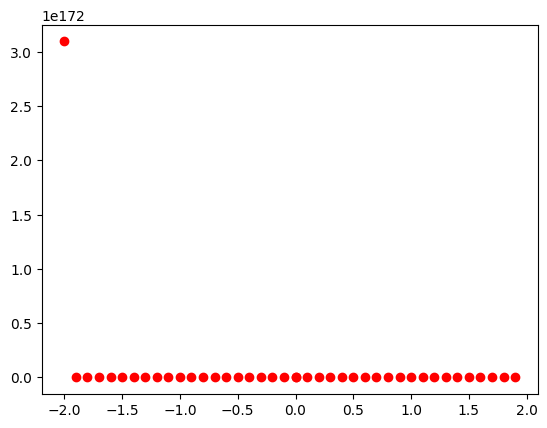

In [ ]:
# Euler's method
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (np.exp(x) + np.exp(2*x) - 2*np.exp(x)*y + y**2)

x = 0
y = 3/2
h = 0.1

x_Euler = []
y_Euler = []

while x >= -2:
    y = y + h * f(x, y)
    x = x - h
    x_Euler.append(x)
    y_Euler.append(y)

x_Euler.append(0)
y_Euler.append(3/2)

x = 0
y = 3/2
h = 0.1

while x <= 2:
    y = y + h * f(x, y)
    x_Euler.append(x)
    y_Euler.append(y)
    x = x + h


print(x_Euler)
print(y_Euler)

# Plot
plt.plot(x_Euler, y_Euler, 'ro')
plt.show()

[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002, 4.100000000000001, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.899999999999999, 4.999999999999998, 5.099999999999998, 5.1999999999999975, 5.299999999999997, 5.399999999999997, 5.4999999999999964, 5.599999999999996, 5.699999999999996, 5.799999999999995, 5.899999999999995, 5.99

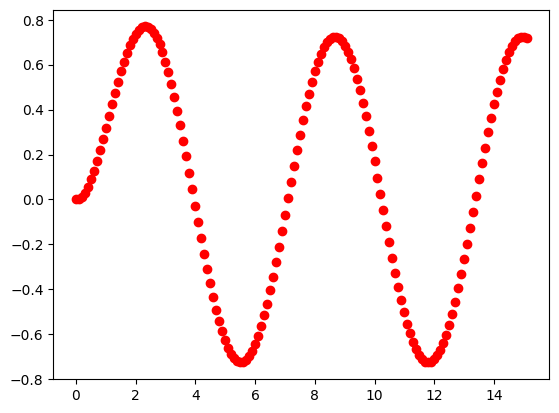

In [ ]:
# Euler's method
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return (np.sin(x) - y)

# Initial condition
x = 0
y = 0

# Step length
h = 0.1

# Data collection list
x_Euler = [x]
y_Euler = [y]

# Euler method
while x < 15:
    y = y + h * f(x, y)
    y_Euler.append(y)
    x = x + h
    x_Euler.append(x)

print(x_Euler)
print(y_Euler)
print(len(x_Euler), len(y_Euler))


# Plot
plt.plot(x_Euler, y_Euler, 'ro')
plt.show()


[0.0001, 0.10010000000000001, 0.2001, 0.30010000000000003, 0.4001, 0.5001, 0.6001, 0.7001, 0.8000999999999999, 0.9000999999999999, 1.0001, 1.1001, 1.2001000000000002, 1.3001000000000003, 1.4001000000000003, 1.5001000000000004, 1.6001000000000005, 1.7001000000000006, 1.8001000000000007, 1.9001000000000008, 2.0001000000000007]
[0.5, -2802.0850929940457, -18053265.101817124, -262061827066755.16, -2.7544695445268763e+28, -1.7370895121373725e+56, -4.181072385825054e+111, -1.487588155958271e+222, -inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
21 21


<ipython-input-97-588eaedd7ab8>:6: RuntimeWarning: overflow encountered in scalar power
  return (((y**2 * np.log(x)) - y) / x)
<ipython-input-97-588eaedd7ab8>:6: RuntimeWarning: invalid value encountered in scalar subtract
  return (((y**2 * np.log(x)) - y) / x)


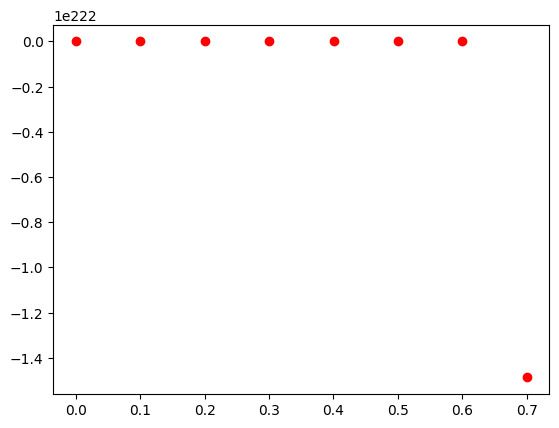

In [ ]:
# Euler's method
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return (((y**2 * np.log(x)) - y) / x)

# Initial condition
x = 0.0001
y = 0.5

# Step length
h = 0.1

# Data collection list
x_Euler = [x]
y_Euler = [y]

# Euler method
while x < 2:
    y = y + h * f(x, y)
    y_Euler.append(y)
    x = x + h
    x_Euler.append(x)

print(x_Euler)
print(y_Euler)
print(len(x_Euler), len(y_Euler))


# Plot
plt.plot(x_Euler, y_Euler, 'ro')
plt.show()


### Second order ODE

To solve second order ODE, we split it into two first order coupled differential equations. For example, consider the dampled harmonic motion,

$\frac{d^2y}{dx^2} + \lambda \frac{dy}{dx} + k y = 0$ ,

which can be split into:

$\frac{dy}{dx} = z = f_1(x, y, z)$ and

$\frac{dz}{dx} = -\lambda z - k y = f_2(x, y, z)$ .

These are the system of first order ODEs. In each ODE, there are different dependent variable (like here one ODE is for $y$ and the other ODE is for $z$) but the same independent variable $x$.

For damped harmonic motion, $y$ is the amplitude and $x$ is the time.

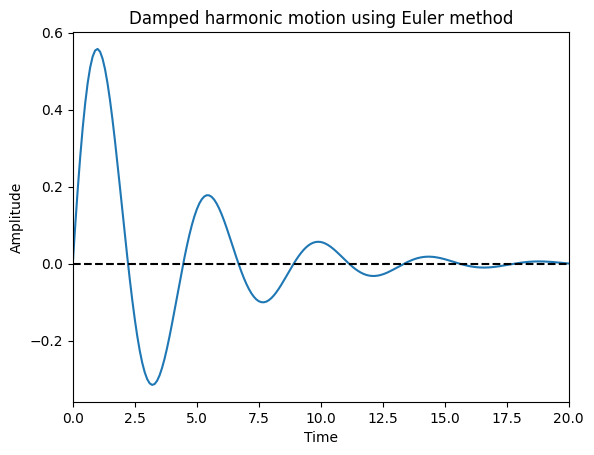

In [ ]:
# Solution of 2nd order ODE (damped harmonic motion) by Euler method

# Dependent variables are y and z. The independent variable is x.

def f1(x, y, z):
    return z

def f2(x, y, z):
    return (-lam*z - k*y)

# Parameters
lam = 0.5
k = 2.0

# Initial condition
x = 0
y = 0
z = 1

# Step length
h = 0.1

# Initial lists to collect data
X = [x]
Y = [y]

# Euler method integration
while x < 20:
    y = y + h * f1(x, y, z)
    z = z + h * f2(x, y, z)
    x = x + h

    X.append(x)
    Y.append(y)

# Plot
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.title('Damped harmonic motion using Euler method')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xlim(0, 20)
plt.show()


[[ 0.          1.        ]
 [ 0.01991751  0.9896418 ]
 [ 0.03962073  0.9785975 ]
 ...
 [ 0.00230648 -0.00657759]
 [ 0.00217455 -0.00660133]
 [ 0.0020422  -0.00661958]]


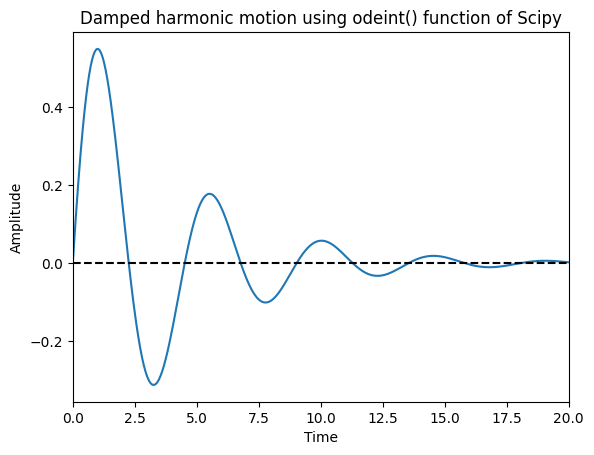

In [ ]:
# Solution of 2nd order ODE (damped harmonic motion) using odeint() function of Scipy
# odeint() function is used to integrate a system (or a set) of ODEs.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plot

# List of all the dependent variables of all the first order ODEs
# u = [y, z]

# Define the function which contains two functions here as we have two coupled first order ODEs. x is the independent variable.
def f(u, x):
    y, z = u   # unpacking
    f1 = z
    f2 = -lam*z - k*y
    return np.array([f1, f2])   # packing

# parameters
lam = 0.5
k = 2.0

# Initial condition
u = [0, 1]

# Grid of independent variable x as numpy array. The dependent variables will be calculated at all values of x.
x = np.linspace(0, 20, 1000)

# Solution by odeint() function of Scipy
solution = odeint(f, u, x)
print(solution)
# print(solution[:, 0])   # This contains all the rows but for first column i.e. for first component of u which is y here.
# print(solution[:, 1])   # This contains all the rows but for second column i.e., for second component of u which is z here.

# 'solution' contains a 2D array of shape(len(x), len(u)) i.e., 'solution' is a 2D array with each column correspond to
# solution of a dependent variable in the order as given in u. So, here, first column of 'solution' is the y array and
# second column is the z array. The first row contains the initial values.

# Plot
plt.plot(x, solution[:, 0])
plt.title('Damped harmonic motion using odeint() function of Scipy')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xlim(0, 20)
plt.show()


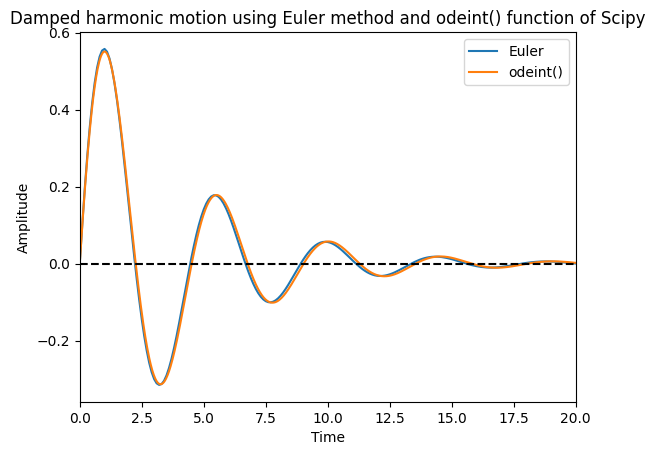

In [ ]:
# Plot the solution obtained by Euler method and odeint() in the same plot

# Plot
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.plot(x, solution[:, 0])
plt.legend(['Euler', 'odeint()'])
plt.title('Damped harmonic motion using Euler method and odeint() function of Scipy')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xlim(0, 20)
plt.show()

# We see that the solutions obtained by Euler method and odeint() function for a damped harmonic motion
# are very close to each other.

### Exercises

#### **Exercise-1: Van der pole oscillator**

The Van der pole oscillator:

$\frac{d^2x}{dt^2} + \epsilon (x^2-1) \frac{dx}{dt} + x = 0$ .

Initial condition: $x(t=0) = 0, \frac{dx}{dt}|_{t = 0} = 2$

$\epsilon = 0.01$. Obtain the phase plot.

Assume, $\frac{dx}{dt} = z$

So, we have,

$\frac{dz}{dt} = -x - \epsilon (x^2-1) z$  .

We have to solve these two first order ODEs, all wrt to the independent variable time $t$. The dependent variables are $x$ and $z$ here.

[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003, 0.57

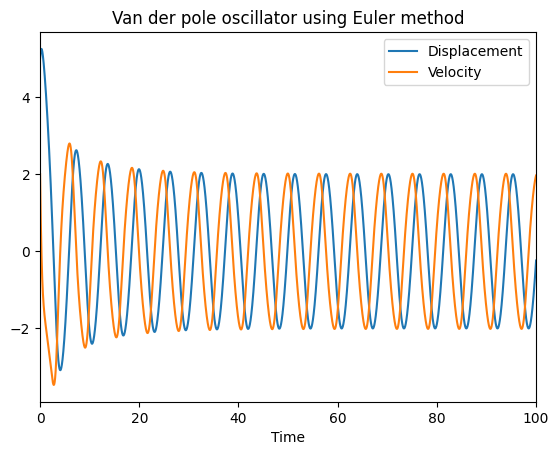

In [ ]:
# Exercise-1: Van der pole oscillator. Solution of 2nd order ODE by Euler method

# Dependent variables = [x, z]. Independent variable = t.

def f1(t, x, z):
    return z

def f2(t, x, z):
    return (-x - (eps*(x**2 - 1)*z))

# Parameters
eps = 0.1

# Initial condition
t = 0
x = 5
z = 2

# Step length
h = 0.01

# Initial lists to collect data
T = [t]   # For independent variable time.
X = [x]   # For dependent variable displacement.
Z = [z]   # For dependent variable velocity.

# Euler method integration
while t < 100:
    x = x + h * f1(t, x, z)
    z = z + h * f2(t, x, z)
    t = t + h

    T.append(t)
    X.append(x)
    Z.append(z)

print(T)
print(X)
print(Z)

# Plot
import matplotlib.pyplot as plt
plt.plot(T, X)
plt.plot(T, Z)
plt.legend(['Displacement', 'Velocity'])
plt.title('Van der pole oscillator using Euler method')
plt.xlabel('Time')
# plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xlim(0, 100)
plt.show()


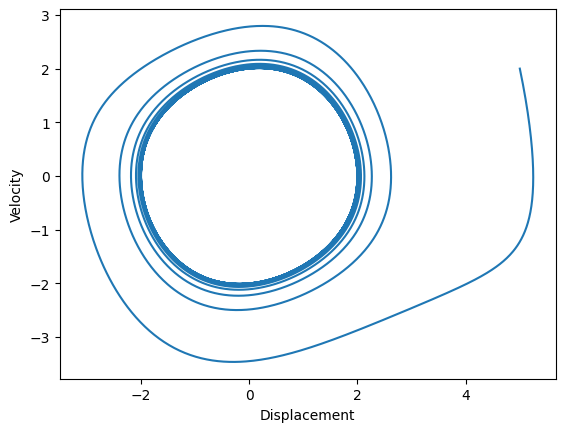

In [ ]:
# Phase space plot: velocity vs displacement.

plt.plot(X, Z)
plt.xlabel('Displacement')
plt.ylabel('Velocity')
plt.show()

#### **Exercise-2: Lorentz equations in chaos theory**

Lorentz equations in chaos theory.

$\frac{dx}{dt} = \sigma (y - x)$  ,

$\frac{dy}{dt} = x (\rho - z) - y$  ,

$\frac{dz}{dt} = xy - \beta z$.

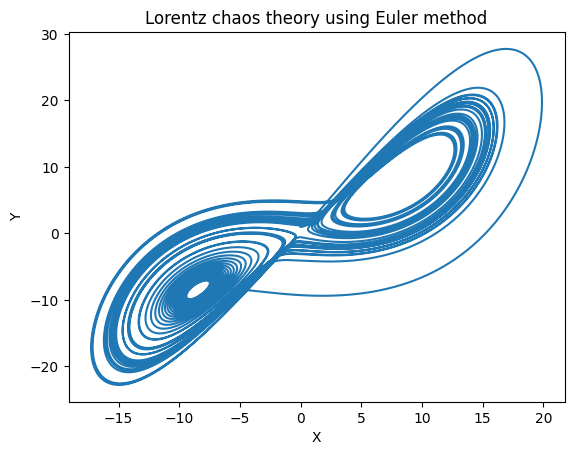

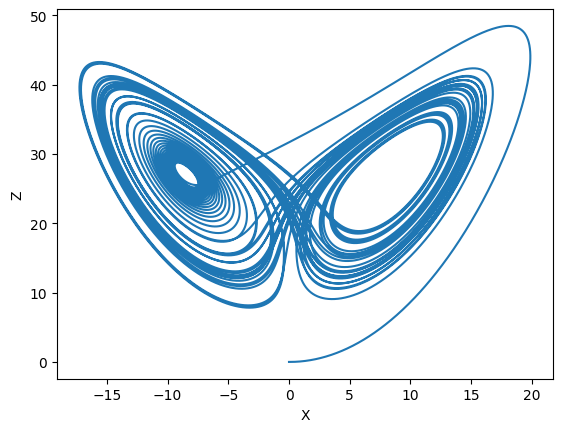

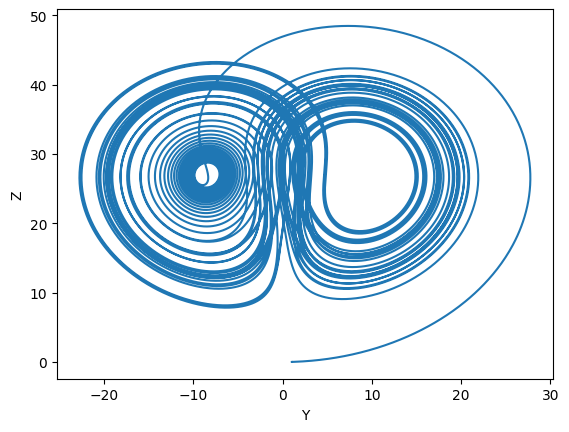

In [ ]:
# Exercise-2: Lorentz equations in chaos theory. Solution of 2nd order ODE by Euler method

# Dependent variables = [x, y, z]. Independent variable = t.

def f1(t, x, y, z):
    return (sigma*(y - x))

def f2(t, x, y, z):
    return (x*(rho - z) - y)

def f3(t, x, y, z):
    return (x*y - beta*z)

# Parameters
sigma = 10
rho = 28
beta = 8/3

# Initial condition
t = 0
x = 0
y = 1
z = 0

# Step length
h = 0.001

# Initial lists to collect data
T = [t]   # For independent variable time.
X = [x]   # For dependent variable x.
Y = [y]   # For dependent variable y.
Z = [z]   # For dependent variable z.

# Euler method integration
while t < 50:
    x = x + h * f1(t, x, y, z)
    y = y + h * f2(t, x, y, z)
    z = z + h * f3(t, x, y, z)
    t = t + h

    T.append(t)
    X.append(x)
    Y.append(y)
    Z.append(z)

# print(T)
# print(X)
# print(Y)
# print(Z)

# Plot
import matplotlib.pyplot as plt
plt.title('Lorentz chaos theory using Euler method')
plt.plot(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.plot(X, Z)
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

plt.plot(Y, Z)
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()
# plt.legend(['Displacement', 'Velocity'])


[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 9.51410240e-02  1.00353835e+00  4.79192579e-04]
 [ 1.82808660e-01  1.03243277e+00  1.86916433e-03]
 ...
 [-1.09848492e+01 -1.02537257e+01  3.10336053e+01]
 [-1.08937811e+01 -9.80621561e+00  3.13001381e+01]
 [-1.07678786e+01 -9.34142862e+00  3.15000502e+01]]


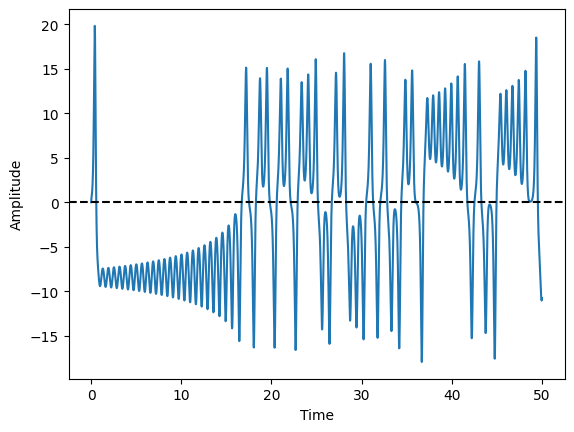

In [ ]:
# Solution of 2nd order ODE using odeint() function of Scipy
# odeint() function is used to integrate a system (or a set) of ODEs.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plot

# Dependent variables = [x, y, z]. Independent variable = t.

# List of all the dependent variables of all the first order ODEs
# u = [x, y, z]

# Define the function which contains two functions here as we have three coupled first order ODEs. t is the independent variable.
def f(u, t):
    x, y, z = u   # unpacking
    f1 = (sigma*(y - x))
    f2 = (x*(rho - z) - y)
    f3 = (x*y - beta*z)
    return np.array([f1, f2, f3])   # packing

# Parameters
sigma = 10
rho = 28
beta = 8/3

# Initial condition
u = [0, 1, 0]

# Step length
h = 0.1

# Grid of independent variable t as numpy array. The dependent variables will be calculated at all values of t.
t = np.linspace(0, 50, 5000)

# Solution by odeint() function of Scipy
solution = odeint(f, u, t)
print(solution)
# print(solution[:, 0])   # This contains all the rows but for first column i.e. for first component of u which is x here.
# print(solution[:, 1])   # This contains all the rows but for second column i.e., for second component of u which is y here.
# print(solution[:, 2])   # This contains all the rows but for third column i.e., for third component of u which is z here.

# 'solution' contains a 2D array of shape(len(x), len(u)) i.e., 'solution' is a 2D array with each column correspond to
# solution of a dependent variable in the order as given in u. So, here, first column of 'solution' is the x array,
# second column is the y array and the thitd column is the z array. The first row contains the initial values.

# Plot
plt.plot(t, solution[:, 0])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.show()


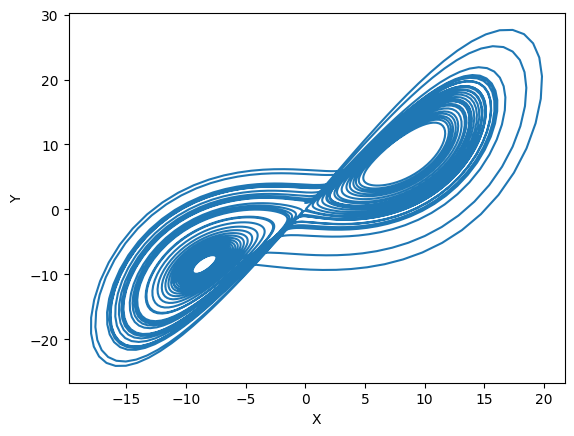

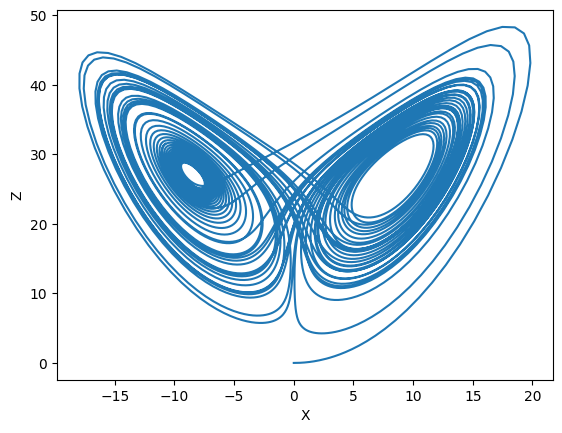

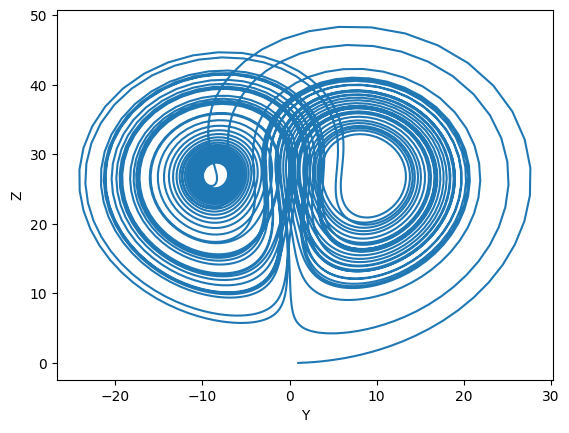

In [ ]:
# Phase space plot

plt.plot(solution[:, 0], solution[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.plot(solution[:, 0], solution[:, 2])
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

plt.plot(solution[:, 1], solution[:, 2])
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()

#### **Exercise-10: Projectile motion**

Projectile motion with air resistance.

$\frac{d^2y}{dt^2} = - g - \frac{k}{m} \frac{dy}{dt}$  ,

$\frac{d^2x}{dt^2} = - \frac{k}{m} \frac{dx}{dt}$  ,

with the initial conditions: $x(t=0) = 0, y(t=0) = 0, \frac{dx}{dt}|_{t=0} = v_0 \sin\theta, \frac{dy}{dt}|_{t=0} = v_0 \cos\theta$ .

We assume, $\frac{dy}{dt} = z_2$ and $\frac{dx}{dt} = z_1$ .

So, we get,

$\frac{dz_1}{dt} = - \frac{k}{m} z_1$ ,

$\frac{dz_2}{dt} = -g - \frac{k}{m} z_2$ .

So, we have four first order differential equations in which the dependent variables are $x, y, z_1, z_2$ (horizontal and vertical components of displacement and velocity) and independent variable is time $t$.

So, finally the initial conditions becomes:

$x(t=0) = 0, y(t=0) = 0, \frac{dx}{dt}|_{t=0} = z_1(t=0) = v_0 \sin\theta, \frac{dy}{dt}|_{t=0} = z_2(t=0) = v_0 \cos\theta$ .

**No air resistance: $k=0$**

In [ ]:
# Solution by odeint() function of Scipy library.
# All are done in SI units.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Dependent variables = [x, y, z1, z2]. Independent variable = t.

# List of all the dependent variables of all the first order ODEs
# u = [x, y, z1, z2]

# Define the function which contains four functions here as we have four coupled first order ODEs. Time t is the independent variable.
def f(u, t):
    x, y, z1, z2 = u   # unpacking
    f1 = z1
    f2 = z2
    f3 = -(k/m) * z1
    f4 = -g - ((k/m) * z2)
    return np.array([f1, f2, f3, f4])   # packing

# Parameters
m = 0.2
g = 10
k = 0   # Air resistance is zero.
v0 = 50
theta = 45

# Total time of flight
TOF = (2*v0*np.sin((np.pi*theta)/180)) / g

# Initial condition
u = [0, 0, v0*(np.sin((np.pi*theta)/180)), v0*(np.cos((np.pi*theta)/180))]

# Grid of independent variable t as numpy array. The dependent variables will be calculated at all values of t.
t = np.arange(0, TOF, 0.1)

# Solution by odeint() function of Scipy
solution = odeint(f, u, t)
# print(solution)
# x = print(solution[:, 0])   # This contains all the rows but for first column i.e. for first component of u which is x here.
# y = print(solution[:, 1])   # This contains all the rows but for second column i.e., for second component of u which is y here.
# z1 = print(solution[:, 2])   # This contains all the rows but for third column i.e., for third component of u which is z1 here.
# z2 = print(solution[:, 3])   # This contains all the rows but for third column i.e., for third component of u which is z2 here.

# 'solution' contains a 2D array of shape(len(x), len(u)) i.e., 'solution' is a 2D array with each column correspond to
# solution of a dependent variable in the order as given in u. So, here, first column of 'solution' is the x array,
# second column is the y array, the thitd column is the z1 array and the fourth column is the z2 array.
# The first row contains the initial values.


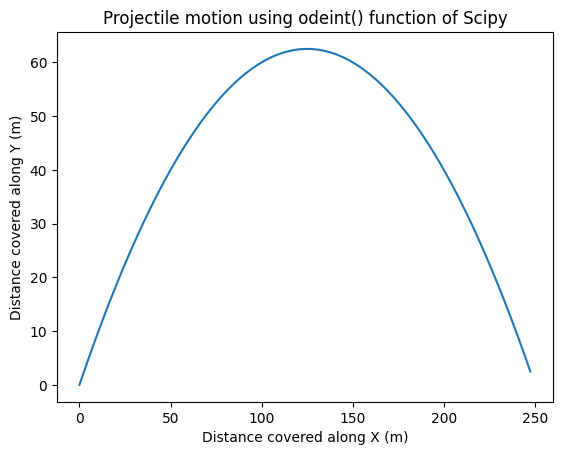

In [ ]:
# Plot
plt.plot(solution[:, 0], solution[:, 1])
plt.xlabel('Distance covered along X (m)')
plt.ylabel('Distance covered along Y (m)')
plt.title('Projectile motion using odeint() function of Scipy')
plt.show()


In [ ]:
print('Horazontal range = ', (v0**2 * np.sin((2*np.pi*theta)/180)) / g , 'm (from formula) and ', np.max(solution[:, 0]), 'm (from odeint() solution)')
print('Maximum height of projectile = ', (v0**2 * (np.sin((np.pi*theta)/180))**2 / (2*g)) , 'm (from formula) and ', np.max(solution[:, 1]), 'm (from odeint() solution)')

Horazontal range =  250.0 m (from formula) and  247.48737341529156 m (from odeint() solution)
Maximum height of projectile =  62.499999999999986 m (from formula) and  62.49368670753548 m (from odeint() solution)


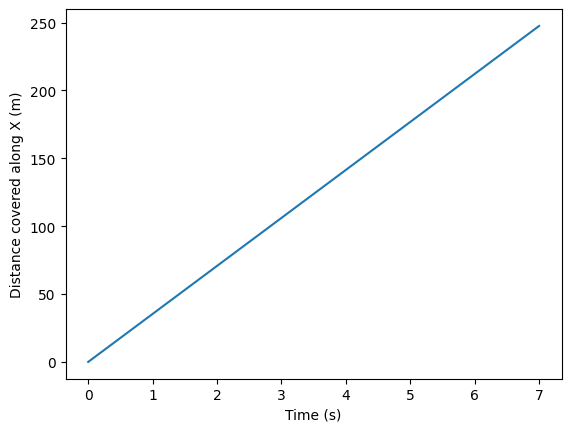

In [ ]:
# Plot
plt.plot(t, solution[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('Distance covered along X (m)')
plt.show()


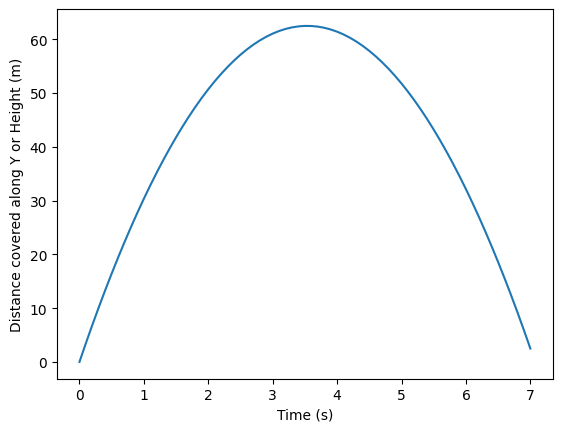

In [ ]:
# Plot
plt.plot(t, solution[:, 1])
plt.xlabel('Time (s)')
plt.ylabel('Distance covered along Y or Height (m)')
plt.show()


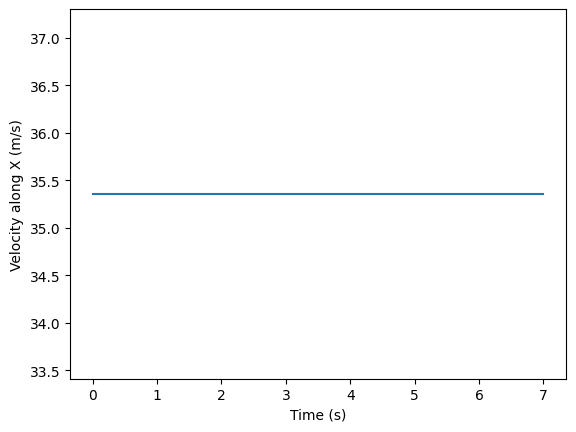

In [ ]:
# Plot
plt.plot(t, solution[:, 2])
plt.xlabel('Time (s)')
plt.ylabel('Velocity along X (m/s)')
plt.show()

# Horizontal component of the velocity is constant.

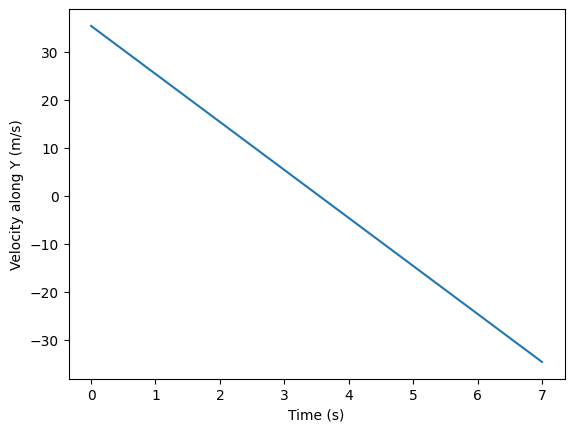

In [ ]:
# Plot
plt.plot(t, solution[:, 3])
plt.xlabel('Time (s)')
plt.ylabel('Velocity along Y (m/s)')
plt.show()

# As the particle go up, the vertical component of the velocity decreases. It becomes zero at the maximum height, and
# it increases in the opposite direction when the particle starts falling.

**With air resistance: $k \ne 0$**

In [ ]:
# Solution by odeint() function of Scipy library.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Dependent variables = [x, y, z1, z2]. Independent variable = t.

# List of all the dependent variables of all the first order ODEs
# u = [x, y, z1, z2]

# Define the function which contains four functions here as we have four coupled first order ODEs. Time t is the independent variable.
def f(u, t):
    x, y, z1, z2 = u   # unpacking
    f1 = z1
    f2 = z2
    f3 = -(k/m) * z1
    f4 = -g - ((k/m) * z2)
    return np.array([f1, f2, f3, f4])   # packing

# Parameters
m = 0.2
g = 10
k = 0.1   # Air resistance is present.
v0 = 50
theta = 45

# Total time of flight
TOF = (2*v0*np.sin((np.pi*theta)/180)) / g

# Initial condition
u = [0, 0, v0*(np.sin((np.pi*theta)/180)), v0*(np.cos((np.pi*theta)/180))]

# Grid of independent variable t as numpy array. The dependent variables will be calculated at all values of t.
t = np.arange(0, TOF/1.5, 0.1)   # We see that for this value of TOF and k, we get a good plot.

# Solution by odeint() function of Scipy
solution = odeint(f, u, t)
# print(solution)
# x = print(solution[:, 0])   # This contains all the rows but for first column i.e. for first component of u which is x here.
# y = print(solution[:, 1])   # This contains all the rows but for second column i.e., for second component of u which is y here.
# z1 = print(solution[:, 2])   # This contains all the rows but for third column i.e., for third component of u which is z1 here.
# z2 = print(solution[:, 3])   # This contains all the rows but for third column i.e., for third component of u which is z2 here.

# 'solution' contains a 2D array of shape(len(x), len(u)) i.e., 'solution' is a 2D array with each column correspond to
# solution of a dependent variable in the order as given in u. So, here, first column of 'solution' is the x array,
# second column is the y array, the thitd column is the z1 array and the fourth column is the z2 array.
# The first row contains the initial values.


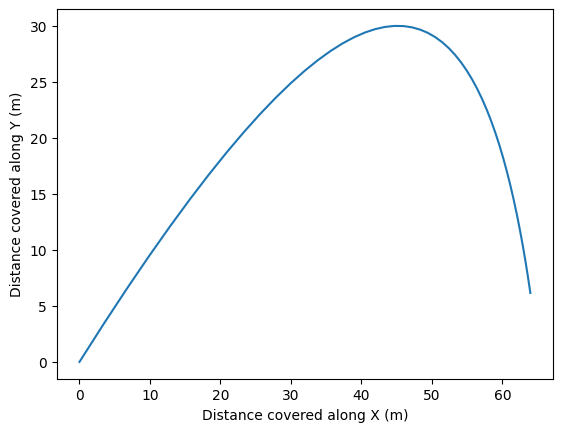

In [ ]:
# Plot
plt.plot(solution[:, 0], solution[:, 1])
plt.xlabel('Distance covered along X (m)')
plt.ylabel('Distance covered along Y (m)')
plt.show()


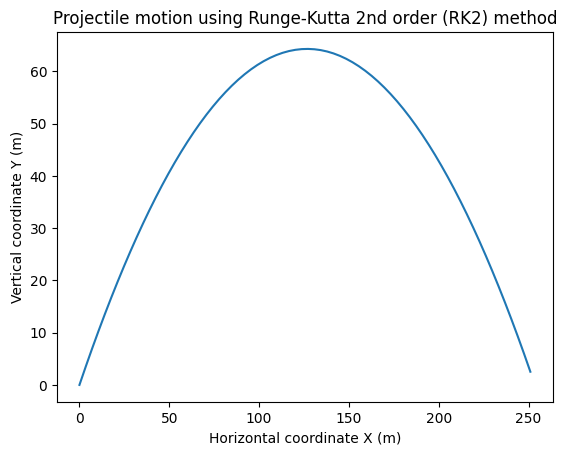

In [ ]:
# The above problem using Runge-Kutta 2nd order (RK2) method.

# Dependent variables = [x, y, z1, z2]. Independent variable = t.

def f1(t, x, y, z1, z2):
    return z1

def f2(t, x, y, z1, z2):
    return z2

def f3(t, x, y, z1, z2):
    return -(k/m) * z1

def f4(t, x, y, z1, z2):
    return -g - ((k/m) * z2)


# Parameters
m = 0.2
g = 10
k = 0   # Air resistance is zero.
v0 = 50
theta = 45

# Total time of flight
TOF = (2*v0*np.sin((np.pi*theta)/180)) / g

# Initial condition
t = 0
x = 0
y = 0
z1 = v0*(np.sin((np.pi*theta)/180))
z2 = v0*(np.cos((np.pi*theta)/180))

# Step length
h = 0.1

# Initial lists to collect data
T = [t]   # For independent variable time.
X = [x]   # For dependent variable x.
Y = [y]   # For dependent variable y.
Z1 = [z1]   # For dependent variable z1.
Z2 = [z2]   # For dependent variable z2.

# Euler method integration
while t <= TOF:
    x = x + 0.5 * h * (f1(t, x, y, z1, z2) + f1(t+h, x+(h*f1(t, x, y, z1, z2)), y, z1, z2))
    y = y + 0.5 * h * (f2(t, x, y, z1, z2) + f2(t+h, x, y+(h*f2(t, x, y, z1, z2)), z1, z2))
    z1 = z1 + 0.5 * h * (f3(t, x, y, z1, z2) + f3(t+h, x, y, z1+(h*f3(t, x, y, z1, z2)), z2))
    z2 = z2 + 0.5 * h * (f4(t, x, y, z1, z2) + f4(t+h, x, y, z1, z2+(h*f4(t, x, y, z1, z2))))
    t = t + h

    T.append(t)
    X.append(x)
    Y.append(y)
    Z1.append(z1)
    Z2.append(z2)

# print(T)
# print(X)
# print(Y)
# print(Z1)
# print(Z2)

# Plot
import matplotlib.pyplot as plt
plt.title('Projectile motion using Runge-Kutta 2nd order (RK2) method')
plt.plot(X, Y)
plt.xlabel('Horizontal coordinate X (m)')
plt.ylabel('Vertical coordinate Y (m)')
plt.show()


In [ ]:
print('Horazontal range = ', (v0**2 * np.sin((2*np.pi*theta)/180)) / g , 'm (from formula) and ', np.max(X), 'm (from RK2 method)')
print('Maximum height of projectile = ', (v0**2 * (np.sin((np.pi*theta)/180))**2 / (2*g)) , 'm (from formula) and ', np.max(Y), 'm (from RK2 method)')

Horazontal range =  250.0 m (from formula) and  251.02290732122435 m (from RK2 method)
Maximum height of projectile =  62.499999999999986 m (from formula) and  64.27922061357856 m (from RK2 method)


#### **Exercise-11: Lagrange points in the solar system**

The equations of motion,

$\frac{dx}{dt} = u$ ,

$\frac{dy}{dt} = v$ ,

$\frac{du}{dt} = 2 \omega v + \omega^2 x - \mu_s \frac{x+\mu_e}{r_s^3} - \mu_e \frac{x-\mu_s}{r_e^3}$ ,

$\frac{dv}{dt} = -2 \omega u + \omega^2 y - \mu_s \frac{y}{r_s^3} - \mu_e \frac{y}{r_e^3}$  ,

where $r_s = \sqrt{(x+\mu_e)^2 + y^2}$, and $r_e = \sqrt{(x-\mu_s)^2 + y^2}$ .

Take $\mu_s = 0.98$, $\mu_e = 1 - \mu_s = 0.02$ .

Initial position (LP): $x_0 = 0.5(\mu_s - \mu_e) + 0.5 \frac{\mu_s - \mu_e}{100}$, $y_0 = -\frac{\sqrt{3}}{2}$ ,

Initial velocity: $u_0 = 0$, $v_0 = -0.01$ .

In [ ]:
# Solution by odeint() function of Scipy library.
# All are done in SI units.

# Reference: https://journal.eu-jr.eu/engineering/article/view/2949/2371 .

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Dependent variables, DV = [x, y, u, v]. Independent variable = t.

# Define the function which contains four functions here as we have four coupled first order ODEs. Time t is the independent variable.
def f(DV, t):
    x, y, u, v = DV   # unpacking
    r_s = np.sqrt((x + mu_e)**2 + y**2)
    r_e = np.sqrt((x - mu_s)**2 + y**2)
    f1 = u
    f2 = v
    f3 = (2 * omega * v) + (omega**2 * x) - (mu_s * ((x + mu_e) / r_s**3)) - (mu_e * ((x - mu_s) / r_e**3))
    f4 = (-2 * omega * u) + (omega**2 * y) - (mu_s * (y / r_s**3)) - (mu_e * (y / r_e**3))
    return np.array([f1, f2, f3, f4])   # packing

# Parameters
mu_s = 0.98
mu_e = 1 - mu_s
omega = 2

# Initial condition
DV = [((0.5 * (mu_s - mu_e)) + (0.5 * ((mu_s - mu_e)/ 100))), -(np.sqrt(3) / 2), 0, -0.01]

# Grid of independent variable t as numpy array. The dependent variables will be calculated at all values of t.
t = np.arange(0, 20, 0.01)

# Solution by odeint() function of Scipy
solution = odeint(f, DV, t)

# print(solution)
x = solution[:, 0]   # This contains all the rows but for first column i.e. for first component of DV which is x here.
y = solution[:, 1]   # This contains all the rows but for second column i.e., for second component of DV which is y here.
u = solution[:, 2]   # This contains all the rows but for third column i.e., for third component of DV which is u here.
v = solution[:, 3]   # This contains all the rows but for third column i.e., for third component of DV which is v here.

# 'solution' contains a 2D array of shape(len(x), len(u)) i.e., 'solution' is a 2D array with each column correspond to
# solution of a dependent variable in the order as given in DV. So, here, first column of 'solution' is the x array,
# second column is the y array, the thitd column is the u array and the fourth column is the v array.
# The first row contains the initial values.


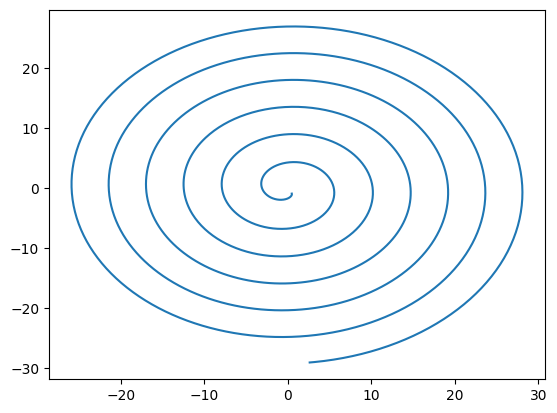

In [ ]:
plt.plot(x, y)
plt.show()

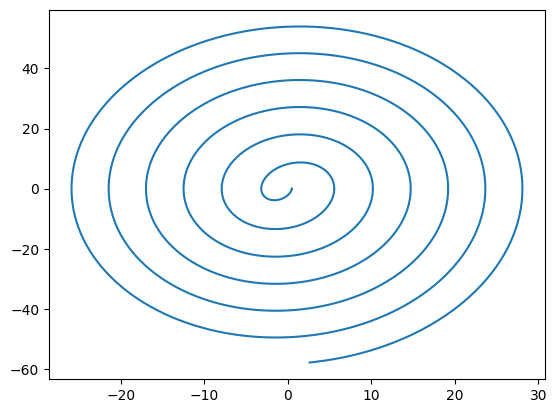

In [ ]:
plt.plot(x, u)
plt.show()

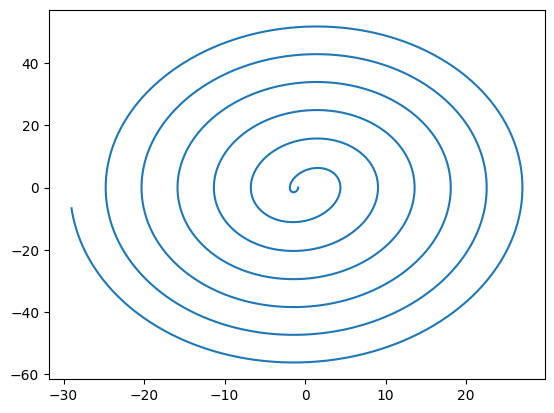

In [ ]:
plt.plot(y, v)
plt.show()

## Solving systems of linear equations

System of linear equations:

$a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1$ \\
$a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n = b_2$ \\
............................................... \\
$a_{n1}x_1 + a_{n2}x_2 + ... + a_{nn}x_n = b_n$

We need to solve for the above $n$ linear equations for $n$ unknowns: $x_1, x_2, ..., x_n$. These unkowns can be real or imaginary. In matrix form,

$AX = B$ .

$A = \begin{pmatrix}
a_{11} & a_{12} & ... & a_{1n} \\
a_{21} & a_{22} & ... & a_{2n} \\
.. & .. & ... & .. \\
a_{n1} & a_{n2} & ... & a_{nn} \\
\end{pmatrix}$

$X = \begin{pmatrix}
x_1 \\
x_2 \\
.. \\
x_n \\
\end{pmatrix}$

and

$B = \begin{pmatrix}
b_1 \\
b_2 \\
.. \\
b_n \\
\end{pmatrix}$

When the square matrix $A$ is non-singlular or $det(A) \ne 0$, then the system has a solution:

$X = A^{-1}B$

For example, lets solve the following system of linear equations:

$3x_1 + 2x_2 + 4x_3 = 7$ \\
$2x_1 + x_2 + x_3 = 4$ \\
$x_1 + 3x_2 + 5x_3 = 2$

We will solve this system of linear eqautions using (i) **`linalg`** module of Numpy and (ii) Gauss elimination method.

### Using **`linalg`** module of NumPy

In [ ]:
import numpy as np

A = np.matrix([[3, 2, 4], [2, 1, 1], [1, 3, 5]])
B = np.matrix([[7], [4], [2]])

print('The A matrix is: \n', A)
print('The B matrix is: \n', B)

A_inv = np.linalg.inv(A)   # Inverse of A matrix.

X = np.dot(A_inv, B)
print('The solution matrix X is: \n', X)

The A matrix is: 
 [[3 2 4]
 [2 1 1]
 [1 3 5]]
The B matrix is: 
 [[7]
 [4]
 [2]]
The solution matrix X is: 
 [[ 2.25 ]
 [-1.125]
 [ 0.625]]


In [ ]:
# We can directly use np.linalg.solve() function.

np.linalg.solve(A, B)

matrix([[ 2.25 ],
        [-1.125],
        [ 0.625]])

### Using Gauss elimination method

In [ ]:
# Testing.

import numpy as np

A = np.array([[3, 2, 4], [2, 1, 1], [1, 3, 5]])

for i in range(3):
    A[i, :] = A[i, :] + 5   # 5 will be added to all the matrix elements for ith row, and all the columns. We don't have to run any loop over columns. Indexing will do that.

print(A)

[[ 8  7  9]
 [ 7  6  6]
 [ 6  8 10]]


In [ ]:
A = np.array([[3, 2, 4], [2, 1, 1], [1, 3, 5]])

A[:, :] = A[:, :] + 5   # 5 will be added to all the matrix elements for all the rows and all the columns. We don't have to run any loop over columns. Indexing will do that.

print(A)

[[ 8  7  9]
 [ 7  6  6]
 [ 6  8 10]]


In [ ]:
import numpy as np

A = np.array([[3, 2, 4], [2, 1, 1], [1, 3, 5]], dtype = 'float')
B = np.array([7, 4, 2], dtype = 'float')

# Define function of Gauss elimination.
def Gauss_elim(A):
    n = len(A)
    for k in range(n-1):
        for i in range(k+1, n):
            ratio = A[i, k] / A[k, k]
            B[i] = B[i] - ratio * B[k]
            A[i, :] = A[i, :] - ratio * A[k, :]
    return A

# Define function of back substitution.
def Back_subs(A, B):
    n = len(A)
    X = np.zeros(n)
    for i in range(n-1, -1, -1):
        X[i] = (B[i] - np.sum(A[i, i+1:n] * X[i+1:n])) / A[i, i]
    return X

# Call the above functions and solve the linear equations.
print('The A matrix after the Gauss elimination: \n', Gauss_elim(A))
print('The solution matrix X: \n', Back_subs(A, B))


The A matrix after the Gauss elimination: 
 [[ 3.          2.          4.        ]
 [ 0.         -0.33333333 -1.66666667]
 [ 0.          0.         -8.        ]]
The solution matrix X: 
 [ 2.25  -1.125  0.625]


In [ ]:
# Alternative method.

import numpy as np

# Coefficient matrix
A = np.array([[3, 2, 4], [2, 1, 1], [1, 3, 5]], dtype = 'float')

# RHS vector
B = np.array([7, 4, 2], dtype = 'float')

# Number of unknowns
n = 3

# Gaussian elimination method
for k in range(n-1):
    for i in range(k+1, n):
        factor = A[i, k] / A[k, k]
        B[i] = B[i] - factor * B[k]
        for j in range(k, n):
            A[i, j] = A[i, j] - factor * A[k, j]

# Back substitution
X = np.zeros(n)
X[n-1] = B[n-1] / A[n-1, n-1]
for i in range(n-2, -1, -1):
    sum = B[i]
    for j in range(i+1, n):
        sum = sum - A[i, j]*X[j]
    X[i] = sum/A[i, i]

print('The A matrix after the Gauss elimination: \n', A)
print('The solution matrix X: \n', X)


The A matrix after the Gauss elimination: 
 [[ 3.          2.          4.        ]
 [ 0.         -0.33333333 -1.66666667]
 [ 0.          0.         -8.        ]]
The solution matrix X: 
 [ 2.25  -1.125  0.625]


### Jacobi's method

This is one of the relaxation methods in which system of linear equations can be solved iteratively in a self-consistent way. The
$i$-th solution at $k$-th iteration is given by,

$x_i^{(k)} = \frac{1}{a_{ii}} \left[ b_i - \sum_{j=1}^{n} a_{ij} x_j^{(k-1)} + a_{ii} x_i^{(k-1)} \right]$ .

Now we will solve for the following system of linear equations using Jacobi's method,

$4x_1 + 3x_2 + x_3 + 2x_4 + 7x_5 = 5$ \\
$3x_1 + 7x_2 + 2x_3 + 5x_4 + 6x_5 = 4$ \\
$x_1 + 2x_2 + 8x_3 + 2x_4 + 2x_5 = 3$ \\
$2x_1 + x_2 - 3x_3 + 11x_4 + 5x_5 = 0$ \\
$2x_1 - 3x_2 + 4x_3 + 2x_4 + 15x_5 = -1$

In [ ]:
# Solution using Jacobi's method.

import numpy as np

A = np.array([[4, 3, 1, 2, 7],
              [3, 7, 2, 5, 6],
              [1, 2, 8, 2, 2],
              [2, 1, -3, 11, 4],
              [2, -3, 4, 2, 15]], dtype = float)

B = np.array([5, 4, 3, 0, -1], dtype = float)

n = len(B)

iteration = 0

# Initial guess solution.
X = np.zeros(5)

# Loop for iteration.
error = 10
error_list = []
while error > 1.e-06:
    for i in range(n):
        X0[i] = X[i]
        X[i] = 1/A[i, i] * (B[i] - np.sum(A[i, :] * X0[:]) + A[i, i] * X0[i])

    error = np.linalg.norm(X-X0)
    error_list.append(error)

    iteration = iteration + 1
    # print(error)
    # print(X0, X)

print('The solution using Jacobi method: \n', X)

# Solution using np.linalg.solve() function.
print('The solution using Numpy linalg module: \n', np.linalg.solve(A, B))

print('Total number of itrations =', iteration)


The solution using Jacobi method: 
 [ 1.694163    0.14371028  0.24031683 -0.14326378 -0.30879566]
The solution using Numpy linalg module: 
 [ 1.69416229  0.14371024  0.240317   -0.14326376 -0.30879562]
Total number of itrations = 205


We see that the results obtained by Jacobi's method agree very well with the results obtained using `np.linalg.solve()` function.

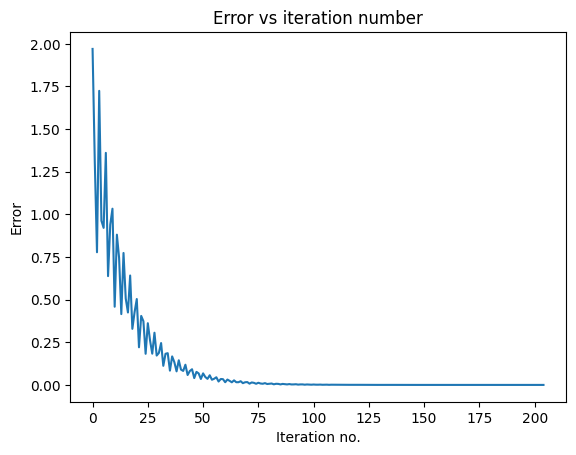

In [ ]:
# Plot of error vs iteration.

import matplotlib.pyplot as plt

plt.plot(range(iteration), error_list)
plt.title('Error vs iteration number')
plt.xlabel('Iteration no.')
plt.ylabel('Error')
plt.show()

# We see that erro decays exponentially with iteration no.

In [ ]:
# Testing.

A = np.array([1, 2, 3])
B = np.array([1, 2, 3])

print(np.dot(A, B))
print(A * B)

14
[1 4 9]


In [ ]:
# Testing.

A = np.array([[1, 2, 3],
             [4, 5, 6]])

B = np.array([1, 2, 3])

print(np.dot(A, B))

[14 32]


In [ ]:
# Solution using Jacobi's method: slight change in code.

import numpy as np

A = np.array([[4, 3, 1, 2, 7],
              [3, 7, 2, 5, 6],
              [1, 2, 8, 2, 2],
              [2, 1, -3, 11, 4],
              [2, -3, 4, 2, 15]], dtype = float)

B = np.array([5, 4, 3, 0, -1], dtype = float)

n = len(B)

iteration = 0

# Initial guess solution.
X = np.zeros(n)

# Put the diagonal elements of A into D
D = []
for i in range(n):
    D.append(A[i, i])

D = np.array(D)
# print(D)

# Loop for iteration.
error = 10
error_list = []
while error > 1.e-06:
    X0 = X
    X = 1/D * (B - np.dot(A, X0) + D * X0)   # Matrix equation using numpy.

    error = np.linalg.norm(X-X0)
    error_list.append(error)

    iteration = iteration + 1
    # print(error)
    # print(X0, X)

print('The solution using Jacobi method: \n', X)

# Solution using np.linalg.solve() function.
print('The solution using Numpy linalg module: \n', np.linalg.solve(A, B))

print('Total number of itrations =', iteration)


The solution using Jacobi method: 
 [ 1.69416266  0.14371052  0.24031715 -0.14326369 -0.30879558]
The solution using Numpy linalg module: 
 [ 1.69416229  0.14371024  0.240317   -0.14326376 -0.30879562]
Total number of itrations = 681


### Gauss-Seidel method by LU decomposition

We have already seen the matrix form of the system of linear equations in the above.

Now in Gauss-Seidel method of LU decomposition, matrix $A$ is decomposed into lower and upper triangular matrices:

$A = L + U$  ,

where, \\
$L = \begin{pmatrix}
a_{11} & 0 & ... & 0 \\
a_{21} & a_{22} & ... & 0 \\
.. & .. & ... & .. \\
a_{n1} & a_{n2} & ... & a_{nn} \\
\end{pmatrix}$

and

$U = \begin{pmatrix}
0 & a_{12} & ... & a_{1n} \\
0 & 0 & ... & a_{2n} \\
.. & .. & ... & .. \\
0 & 0 & ... & 0 \\
\end{pmatrix}$

So, we can now wright,

$AX = B$ \\
$(L+U)X = B$ \\
$LX = B - UX$ \\
$X = L^{-1} (B - UX)$

This equation can be written in self-consistent manner,

$X^{(n+1)} = L^{-1} (B - UX^{(n)})$  .

To proceed numerically we start with some initial guess values of $X$ (the components of the vector). Then through the iteration steps outlined above, the system relaxes towards the true solution.

In [ ]:
# Solution using Gauss-Seidel method by LU decomposition.

import numpy as np

A = np.array([[4, 3, 1, 2, 7],
              [3, 7, 2, 5, 6],
              [1, 2, 8, 2, 2],
              [2, 1, -3, 11, 4],
              [2, -3, 4, 2, 15]], dtype = float)

B = np.array([5, 4, 3, 0, -1], dtype = float)

n = len(B)

iteration = 0

# Initial guess solution.
X = np.zeros(n)

# Get lower triangular matrix L
L = np.tril(A)

# Then get the upper triangular matrix U
U = A - L

# Loop for iteration.
error = 10
error_list = []
while error > 1.e-06:
    X0 = X
    X = np.dot(np.linalg.inv(L), (B - np.dot(U, X0)))   # Matrix equation using numpy.

    error = np.linalg.norm(X-X0)
    error_list.append(error)

    iteration = iteration + 1
    # print(error)
    # print(X0, X)

print('The solution using Gauss-Seidel method by LU decomposition: \n', X)

# Solution using np.linalg.solve() function.
print('The solution using Numpy linalg module: \n', np.linalg.solve(A, B))

print('Total number of itrations =', iteration)


The solution using Gauss-Seidel method by LU decomposition: 
 [ 1.69416168  0.14371024  0.24031699 -0.1432637  -0.30879555]
The solution using Numpy linalg module: 
 [ 1.69416229  0.14371024  0.240317   -0.14326376 -0.30879562]
Total number of itrations = 13


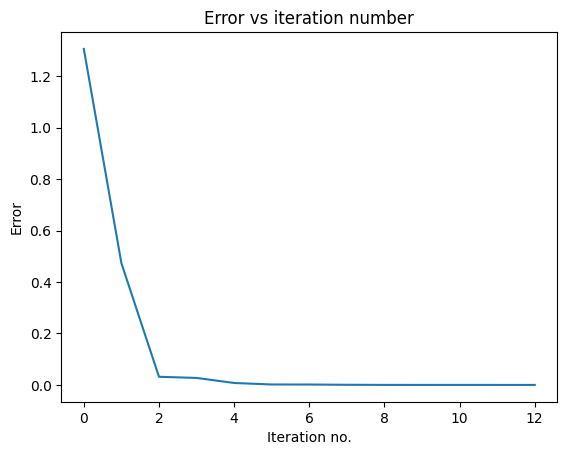

In [ ]:
# Plot of error vs iteration.

import matplotlib.pyplot as plt

plt.plot(range(iteration), error_list)
plt.title('Error vs iteration number')
plt.xlabel('Iteration no.')
plt.ylabel('Error')
plt.show()


We see **huge reduction in the number of iterations** for the system to relax to the solution!

## Curve fitting

### Linear regression

The straight line fit for the $i^{th}$ observation is given by,

$y_i^{pred} = a_0 + a_1 x_i$

Minimizing the error function,

$\epsilon(a_0, a_1) = \sum_{i=1}^{n} (a_0 + a_1 x_i - y_i)^2$

we get the best fit or least square fit -- this is known as **least square method**. We can find the parameters:

$
\begin{pmatrix}
a_0 \\
a_1 \\
\end{pmatrix} =
\begin{pmatrix}
n & \sum_{i=1}^{n} x_i \\
\sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \\
\end{pmatrix} ^{-1}
\begin{pmatrix}
\sum_{i=1}^{n} y_i \\
\sum_{i=1}^{n} x_i y_i \\
\end{pmatrix}
$


The intercept and slope of linear regression: [1.35] [2.05]


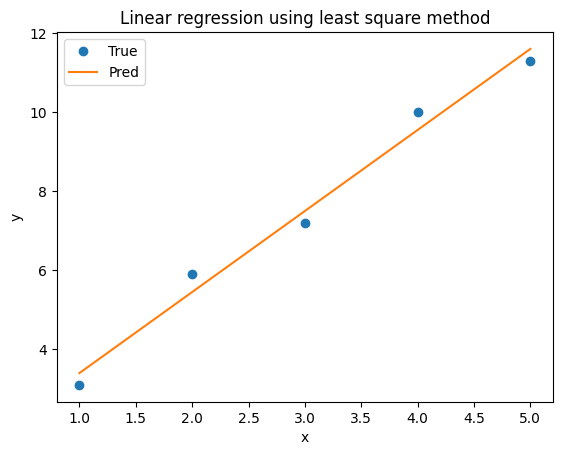

In [ ]:
# Linear regression: Least square method using matrix equation.

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([3.1, 5.9, 7.2, 10.0, 11.3])

# Matrix elements
n = len(x)
sum_x = np.sum(x)
sum_x2 = np.sum(x**2)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)

# Solving the matrix equation
a_0, a_1 = np.dot(np.linalg.inv(np.array([[n, sum_x], [sum_x, sum_x2]])), np.array([[sum_y], [sum_xy]]))
print('The intercept and slope of linear regression:', a_0, a_1)

# Output y_pred for best fit linear regression line
y_pred = a_0 + a_1 * x
# print(y_pred)

# Plot
plt.plot(x, y, 'o')
plt.plot(x, y_pred)
plt.title('Linear regression using least square method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True', 'Pred'])
plt.show()


**Goodness of fit:**

The quality of linear regression fit can be measured by different measurments such as,

(i) Correlation coefficient,

$r = \frac{\sigma_{xy}}{\sigma_x \sigma_y} = \frac{SS_{xy}}{\sqrt{SS_{xx} SS_{yy}}}$ ,

where,

$SS_{xx} = \sum_{i=1}^n (x_i - \bar{x})^2$

$SS_{yy} = \sum_{i=1}^n (y_i - \bar{y})^2$

$SS_{xy} = \sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})$ .

(ii) Estimator for variance,

$s^2 = \sum_{i=1}^n \frac{\epsilon_i^2}{n-2} = \sqrt{\frac{SS_{yy} - \frac{SS_{xy}^2}{SS_{xx}}}{n-2}}$ ,

where $\epsilon_i = y_i^{pred} - y_i$ .

(iii) Standard errors in $a_0$ and $a_1$ are calculated as,

$SE(a_0) = s \sqrt{\frac{1}{n} + \frac{\bar{x}^2}{SS_{xx}}}$ and $SE(a_1) = \frac{s}{\sqrt{SS_{xx}}}$ .

(iv) Chi-square goodness of fit ($\chi^2$ fit),

$\chi^2 = \sum_{i=1}^n \frac{(O_i - E_i)^2}{E_i}$

where $O_i, E_i$ are observed and expected values for $i^{th}$ observation, respectively.

In [ ]:
# Compute goodness of fit.

SS_xx = np.sum((x - np.mean(x))**2)
SS_yy = np.sum((y - np.mean(y))**2)
SS_xy = np.sum((x - np.mean(x)) * (y_pred - np.mean(y)))

s = np.sqrt((SS_yy - (SS_xy**2 / SS_xx)) / (n-2))

# Correlation coefficient
r = SS_xy / np.sqrt(SS_xx * SS_yy)
print('Correlation coefficient =', r)

# Standard errors in intercept and slope
SE_a0 = s * np.sqrt((1/n) + (np.mean(x)**2 / SS_xx))
print('Standard error in intercept =', SE_a0)

SE_a1 = s / np.sqrt(SS_xx)
print('Standard error in slope =', SE_a1)

# Chi-squre goodness of fit
chi_square = np.sum((y - y_pred)**2 / y_pred)
print('Chi-square value is =', chi_square)


Correlation coefficient = 0.9920645329164463
Standard error in intercept = 0.49749371855330116
Standard error in slope = 0.14999999999999733
Chi-square value is = 0.10458936070937719


### Quadratic fit

The quadratic fit for the $i^{th}$ observation is given by,

$y_i^{pred} = a_0 + a_1 x_i + a_2 x_i^2$  .

Polynomial of degree 2.

$
\begin{pmatrix}
a_0 \\
a_1 \\
a_2 \\
\end{pmatrix} =
\begin{pmatrix}
n & \sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \\
\sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 \\
\sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 & \sum_{i=1}^{n} x_i^4 \\
\end{pmatrix} ^{-1}
\begin{pmatrix}
\sum_{i=1}^{n} y_i \\
\sum_{i=1}^{n} x_i y_i \\
\sum_{i=1}^{n} x_i^2 y_i \\
\end{pmatrix}
$


The coefficients of fit are = [-0.18138571] [-0.32208857] [1.35368571]


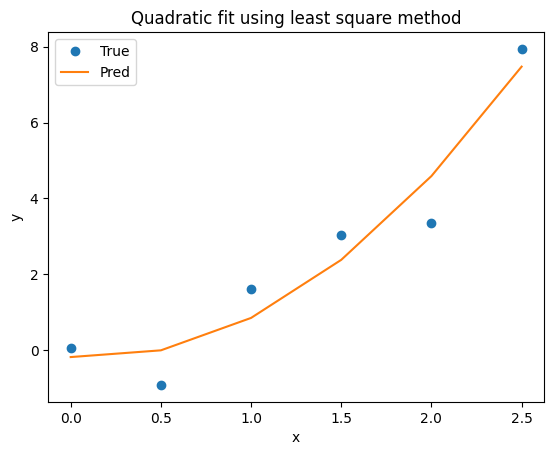

In [ ]:
# Quadratic fit: Least square method using matrix equation.

import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0.5, 1, 1.5, 2, 2.5])
y = np.array([0.0674, -0.9156, 1.6253, 3.0377, 3.3535, 7.9409])

# Matrix elements
n = len(x)
sum_x = np.sum(x)
sum_x2 = np.sum(x**2)
sum_x3 = np.sum(x**3)
sum_x4 = np.sum(x**4)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)
sum_x2y = np.sum(x**2 * y)

# Solving the matrix equation
a_0, a_1, a_2 = np.dot(np.linalg.inv(np.array([[n, sum_x, sum_x2], [sum_x, sum_x2, sum_x3], [sum_x2, sum_x3, sum_x4]])), np.array([[sum_y], [sum_xy], [sum_x2y]]))
print('The coefficients of fit are =', a_0, a_1, a_2)

# Output y_pred for best fit linear regression line
y_pred = a_0 + a_1 * x + a_2 * x**2
# print(y_pred)

# Plot
plt.plot(x, y, 'o')
plt.plot(x, y_pred)
plt.title('Quadratic fit using least square method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True', 'Pred'])
plt.show()


### Using Numpy `polyfit()` function

We can use `numpy.polynomial.polynomial.polyfit()` function for curve fitting by polynomial of any specified degree.

In [1]:
# Using numpy.polynomial.polynomial.polyfit() function.

import numpy as np

import matplotlib.pyplot as plt

x = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
y = np.array([76, 92, 106, 123, 132, 151, 179, 203, 227, 249])

